<a href="https://colab.research.google.com/github/prakashsukhwal/Misc./blob/main/TS_GARCH_R_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('pacman')

In [ ]:
pacman::p_load(lubridate, ggplot2, xts, quantmod, rugarch, PerformanceAnalytics)# might take a while in colab

In [3]:
options(repr.plot.width=18, repr.plot.height=10)# control the fig sizes

## Problem Statement

---
The original data set (AAPL.csv) contains the Apple Company Stock Price from 02/01/2015 to 30/12/2019, i.e., 5 years daily stock price. Extracted from https://sg.finance.yahoo.com/
It is then transformed to daily stock returns (%) as seen in AAPL_Returns.csv. 
You may refer to the below link on how to convert adjusted closing price to stock returns: 
“How to Find a Stock Return Using the Adjusted Closing Price”
https://finance.zacks.com/stock-return-using-adjusted-closing-price-11628.html#:~:text=To%20calculate%20a%20monthly%20stock,by%20the%20prior%20month's%20price.

Perform the conversion (AAPL to AAPL_returns) and then fit a GARCH model for forecasting using R or Python. State any assumptions that you are considering. 
Use Dec 2019 as the test period and comment on the quality of your forecast. Choose appropriate error measure suitable to the situation. 
Try to predict the same series using standard ARMA/SARMA process ( i.e. not  GARCH)
Compare the test period results and comment which one is better? 
Articulate your solution in a 2-3 page main report, providing the R code(GARCH) in the Appendix.   





## Data import

### Getting the data for training 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "AAPL"

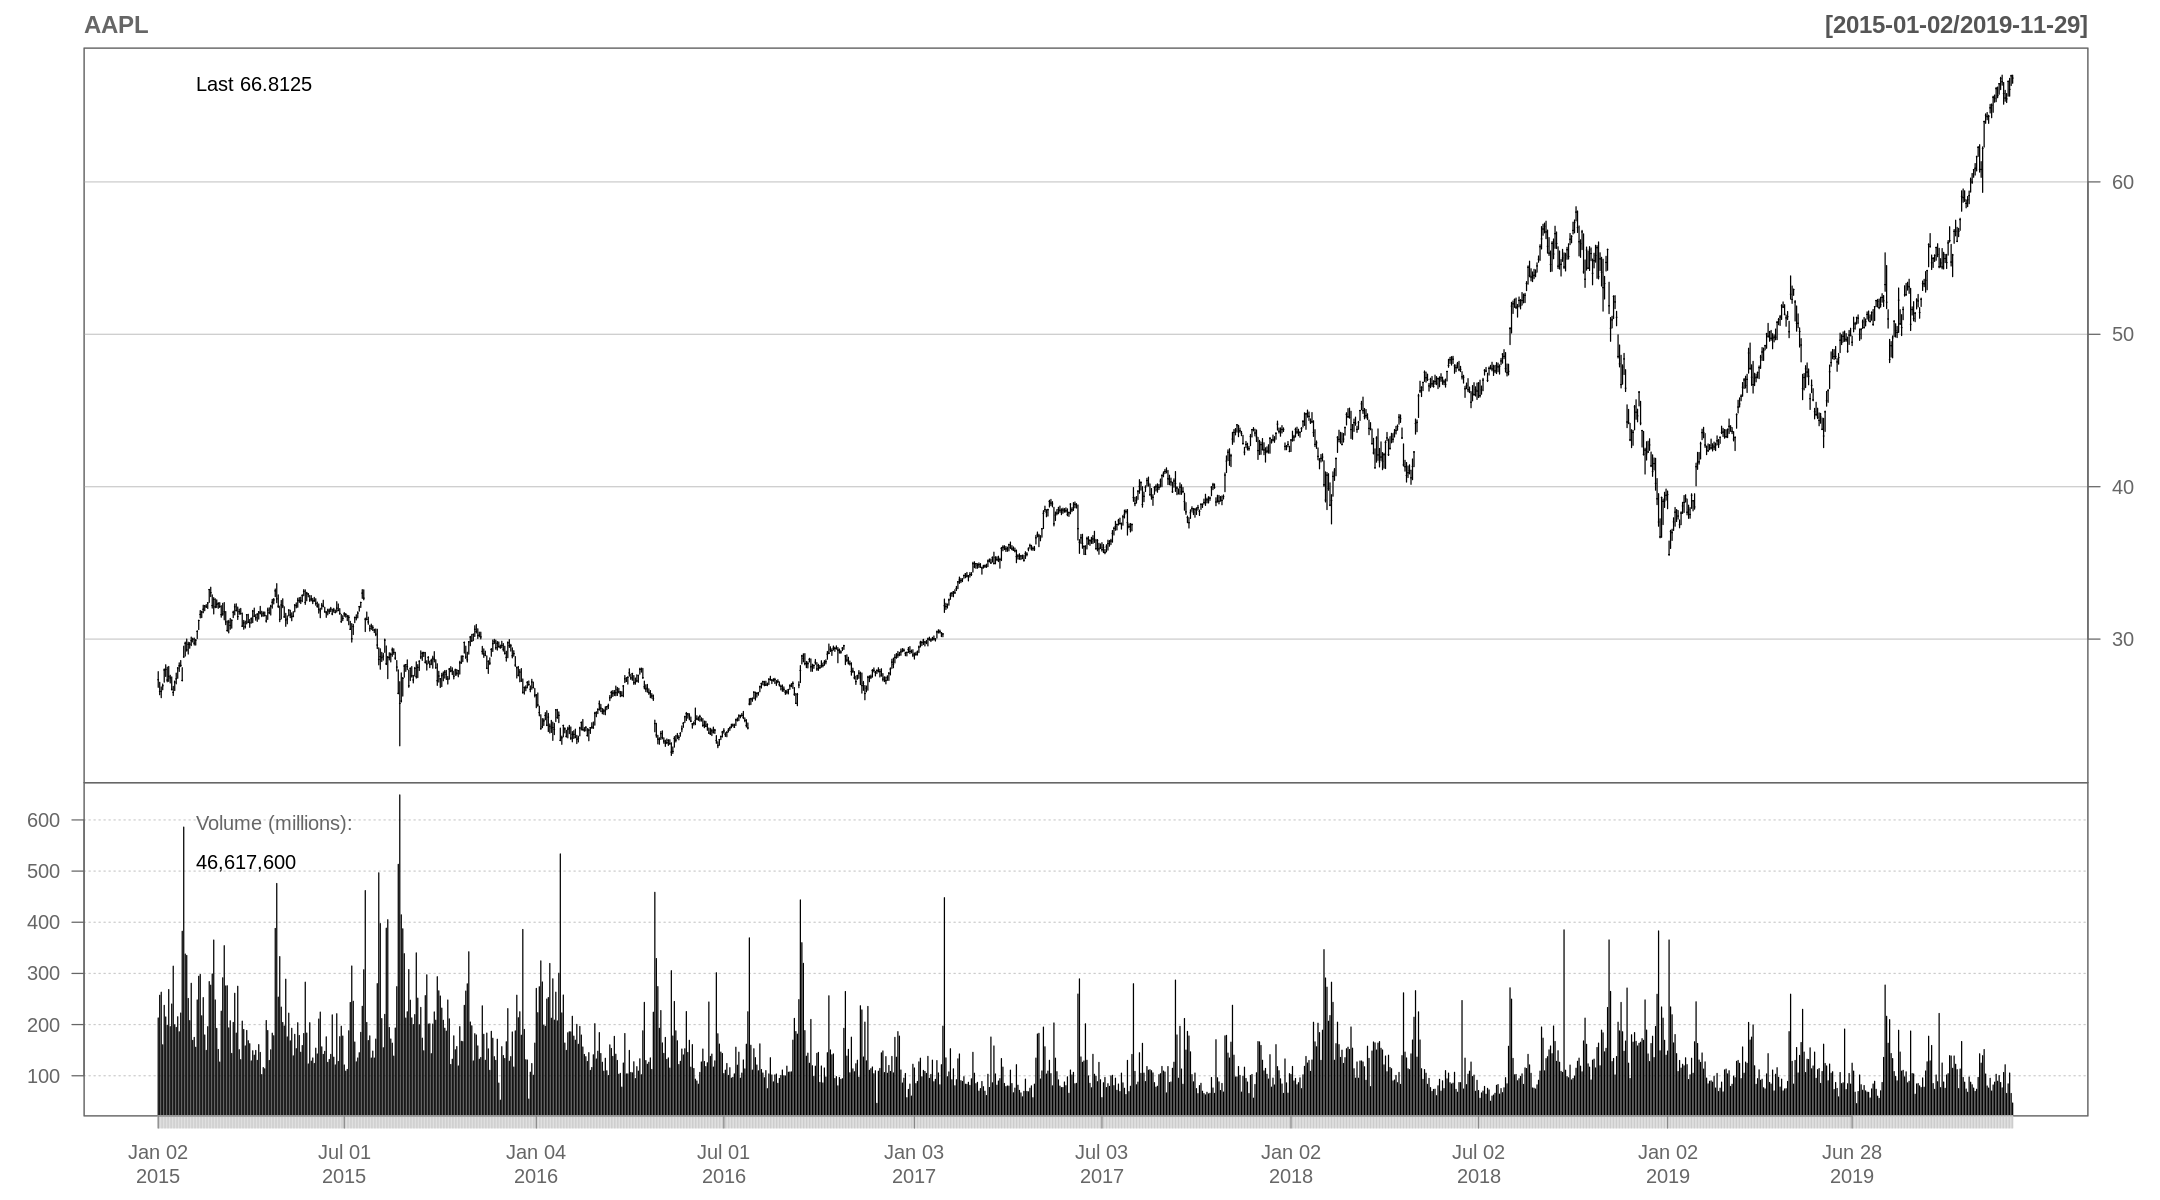

In [4]:
# Apple daily prices
getSymbols("AAPL",from = "2015-01-02",to = "2019-11-30")

# chartSeries(AAPL)
barChart(AAPL, theme='white.mono',bar.type='hlc')
# candleChart(AAPL,multi.col=TRUE,theme='white') 

##### Compute Returns

In [5]:
return = CalculateReturns(AAPL$AAPL.Close)
head(return,4)

              AAPL.Close
2015-01-02            NA
2015-01-05 -2.817159e-02
2015-01-06  9.415529e-05
2015-01-07  1.402217e-02

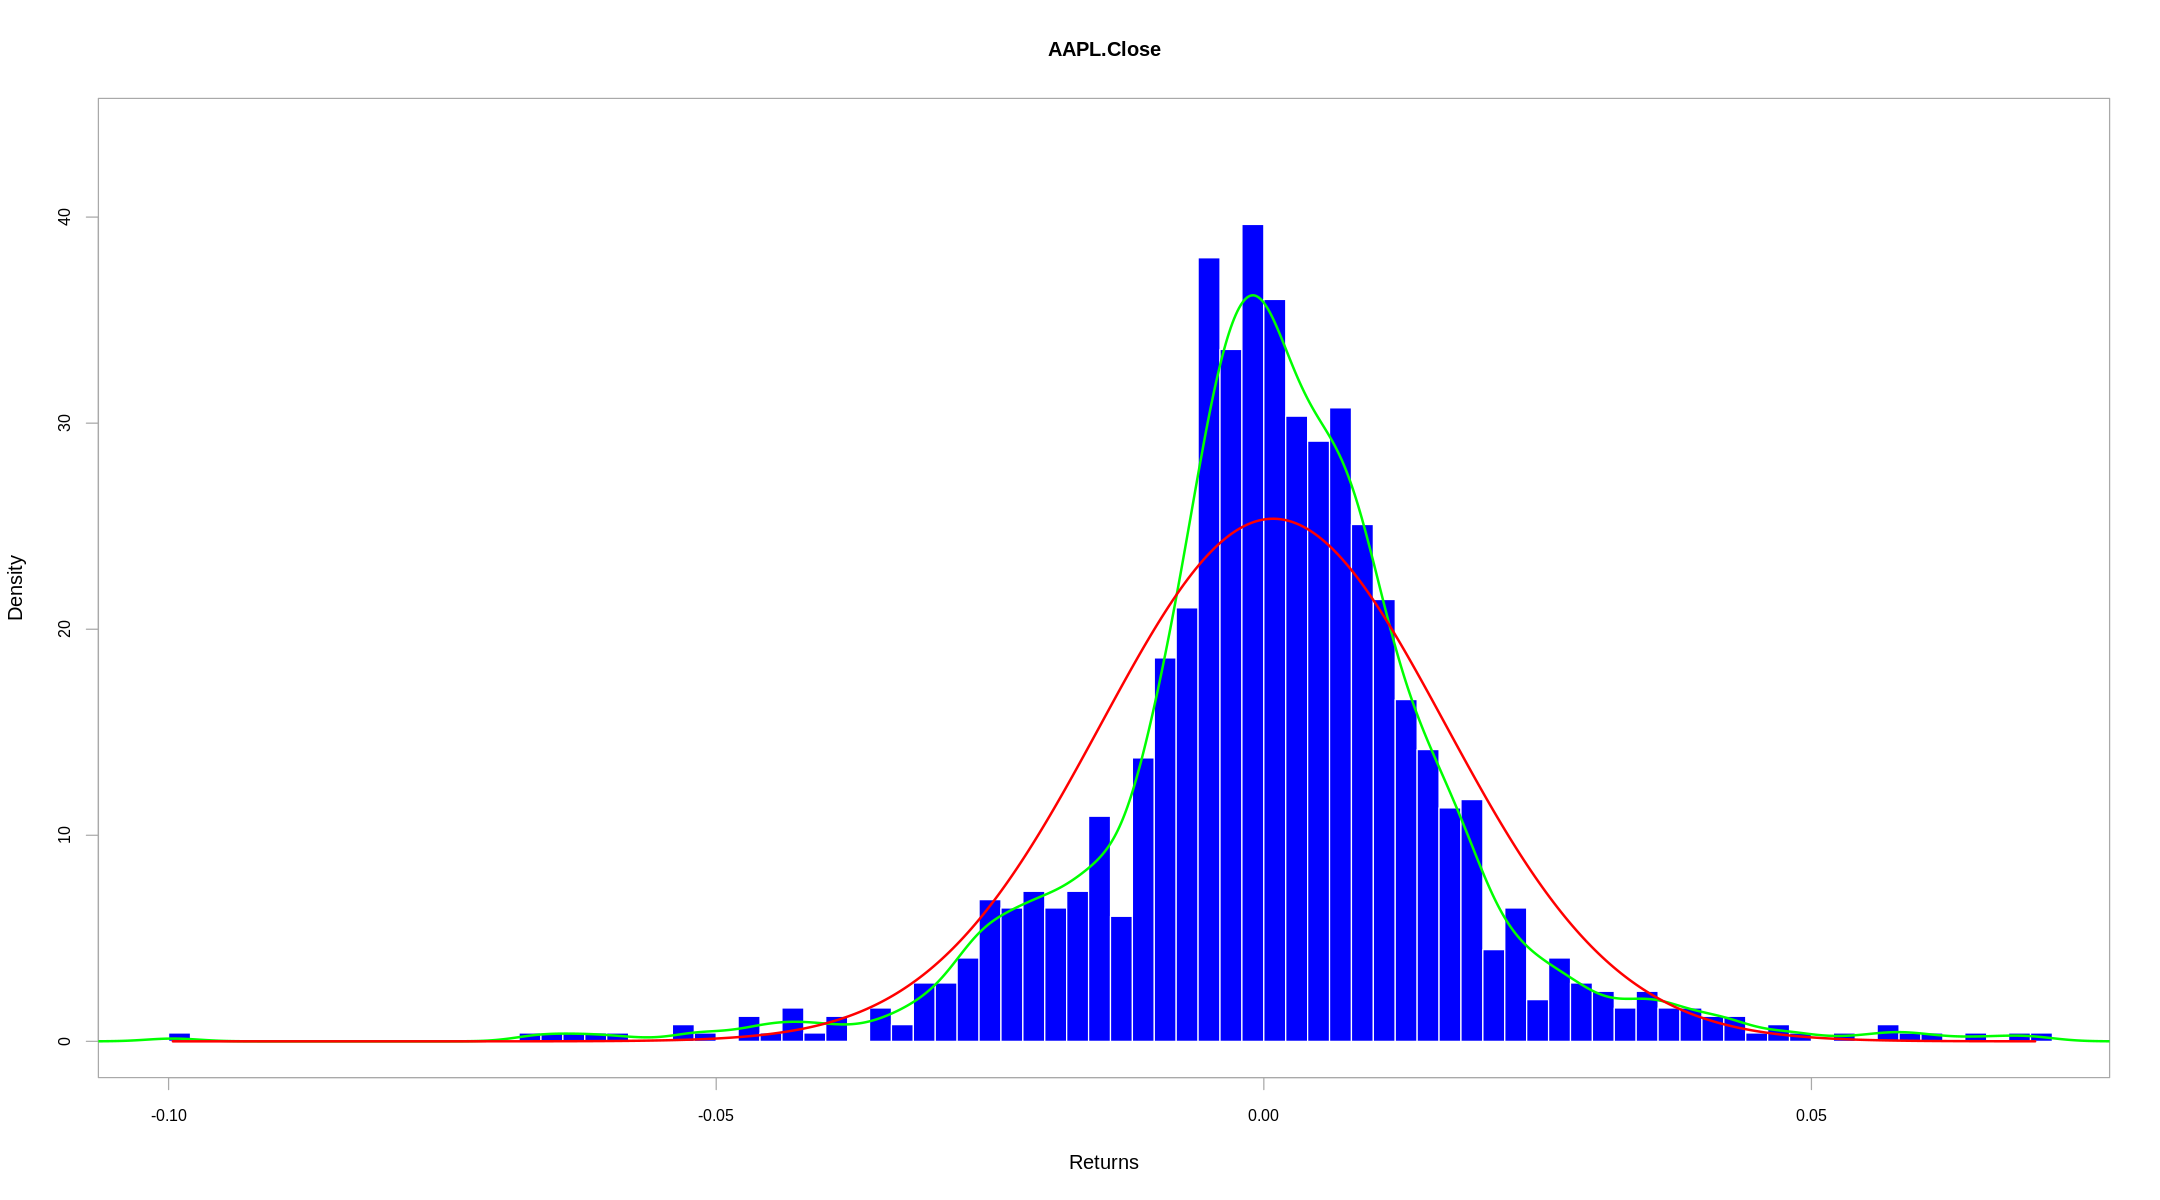

In [6]:
# first row has missing 
return = return[-1]

chart.Histogram(return,
                methods = c('add.density', 'add.normal'),
                colorset = c('blue', 'green', 'red'))

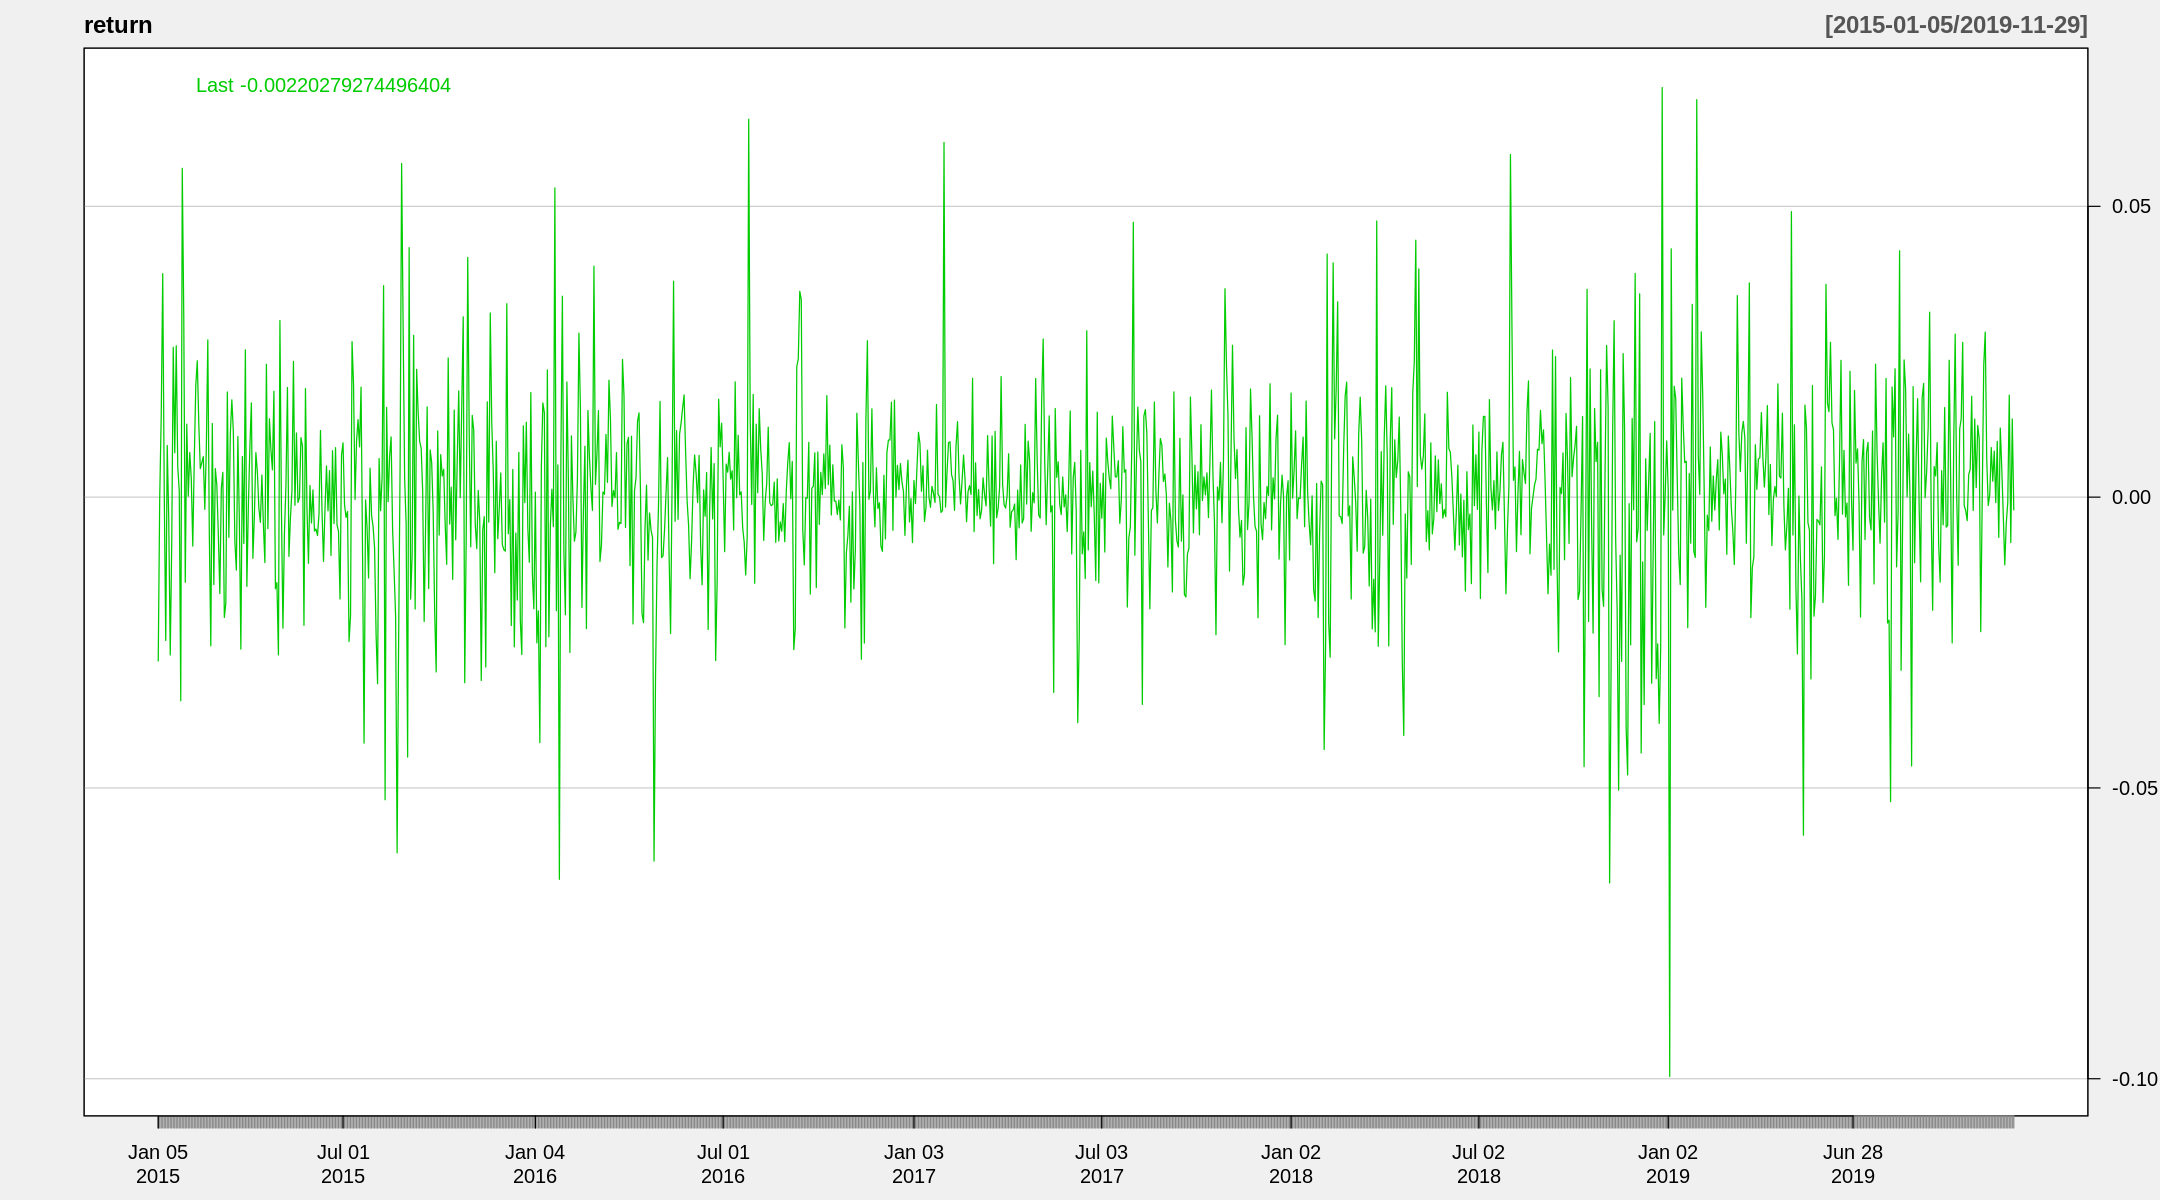

In [7]:
chartSeries(return, theme='white')

##### Annualized volatility
**Note**: considering 252 (width parameter below) trading days in a year
and set width to 22 trading days in a month

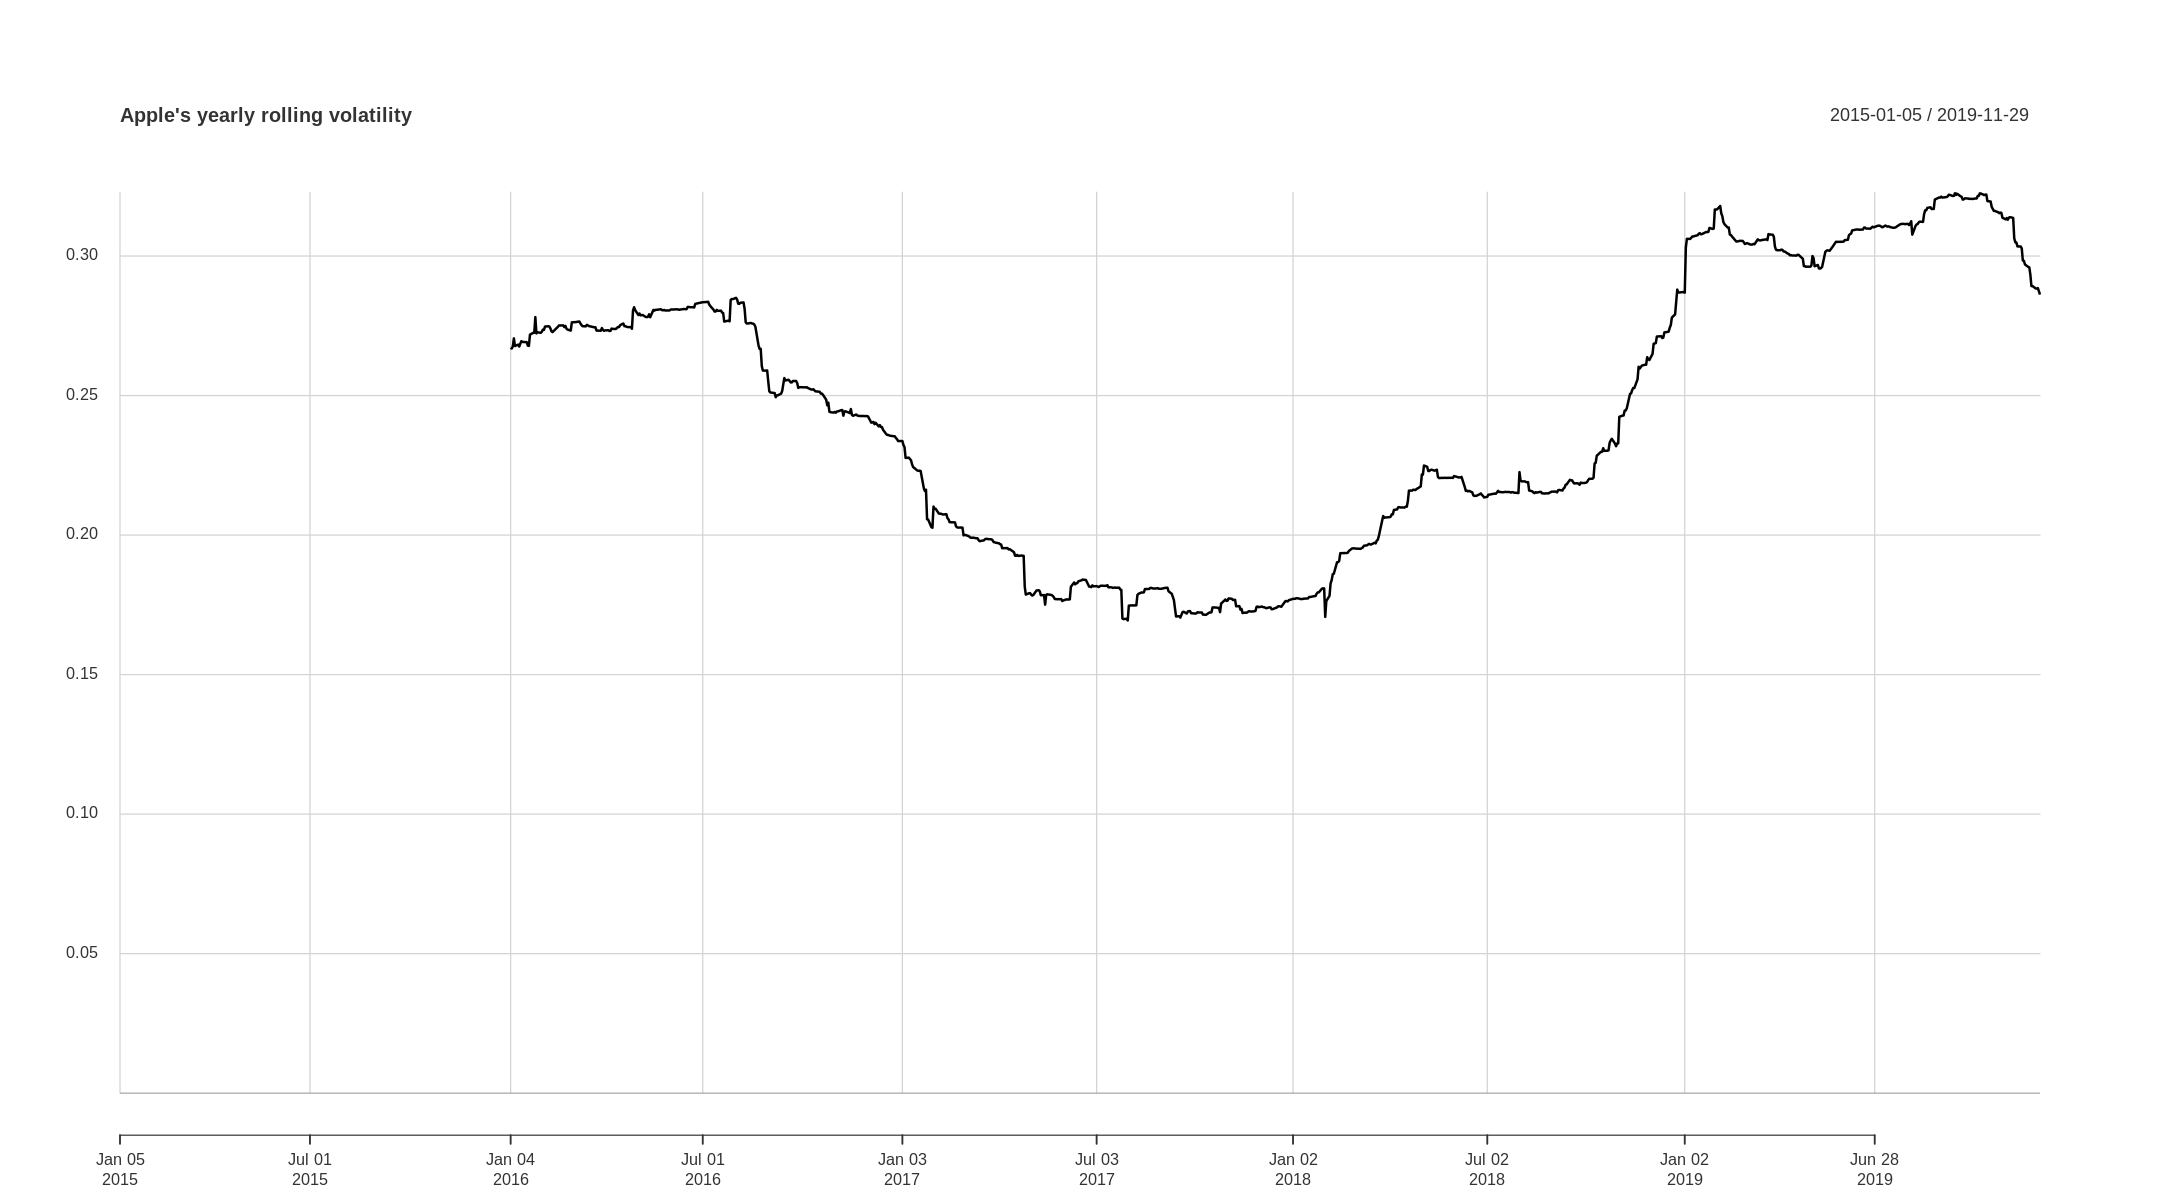

In [8]:
# Annualized volatility
## 22 trading days in a month
chart.RollingPerformance(R = return["2015::2019"],
                         width = 252,
                         FUN = "sd.annualized",
                         scale = 252,
                         main = "Apple's yearly rolling volatility")


#### Standard GARCH model


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001592    0.000396   4.0183  5.9e-05
omega   0.000020    0.000004   4.5543  5.0e-06
alpha1  0.122882    0.025678   4.7854  2.0e-06
beta1   0.800597    0.033960  23.5745  0.0e+00

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001592    0.000415   3.8370 0.000125
omega   0.000020    0.000006   3.0918 0.001989
alpha1  0.122882    0.031193   3.9394 0.000082
beta1   0.800597    0.041813  19.1469 0.000000

LogLikelihood : 3443.095 

Information Criteria
------------------------------------
                    
Akaike       -5.5649
Bayes        -5.5483
Shibata      -5.5649
Hannan-Quinn -5.5586

Weig

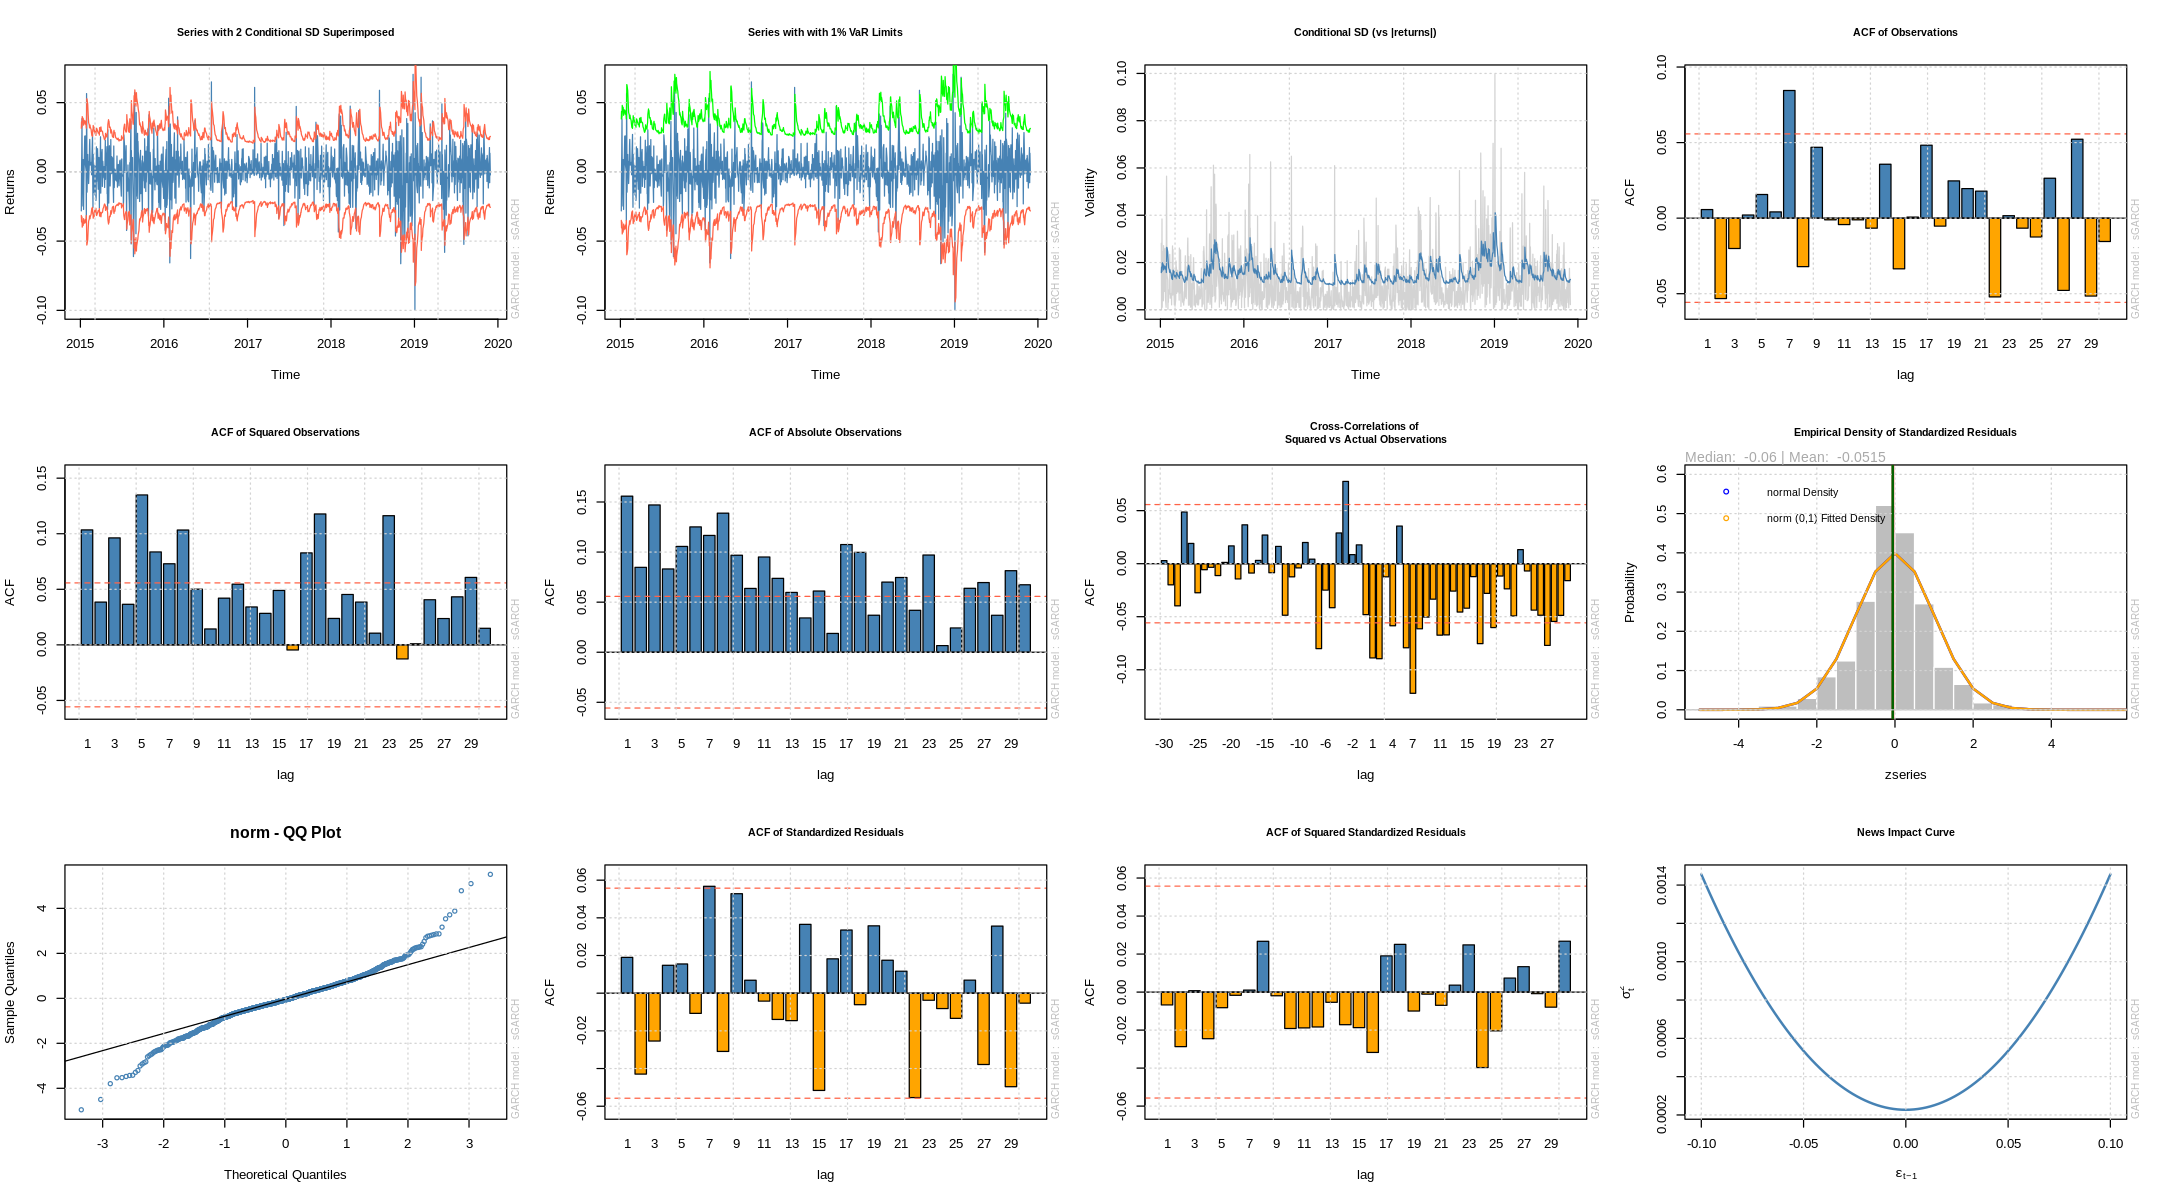

In [9]:
# 1. model with constant mean

# model specification
# sGARCH model with contant mean
s = ugarchspec(mean.model = list(armaOrder = c(0,0)),
                variance.model = list(model = "sGARCH"),
                distribution.model = 'norm')
m = ugarchfit(data = return, spec = s)
print(m)
plot(m, which='all')
# Note: all goodness of fit values are < 0.05 which means that this model can be improved
# Akaike       -5.5727

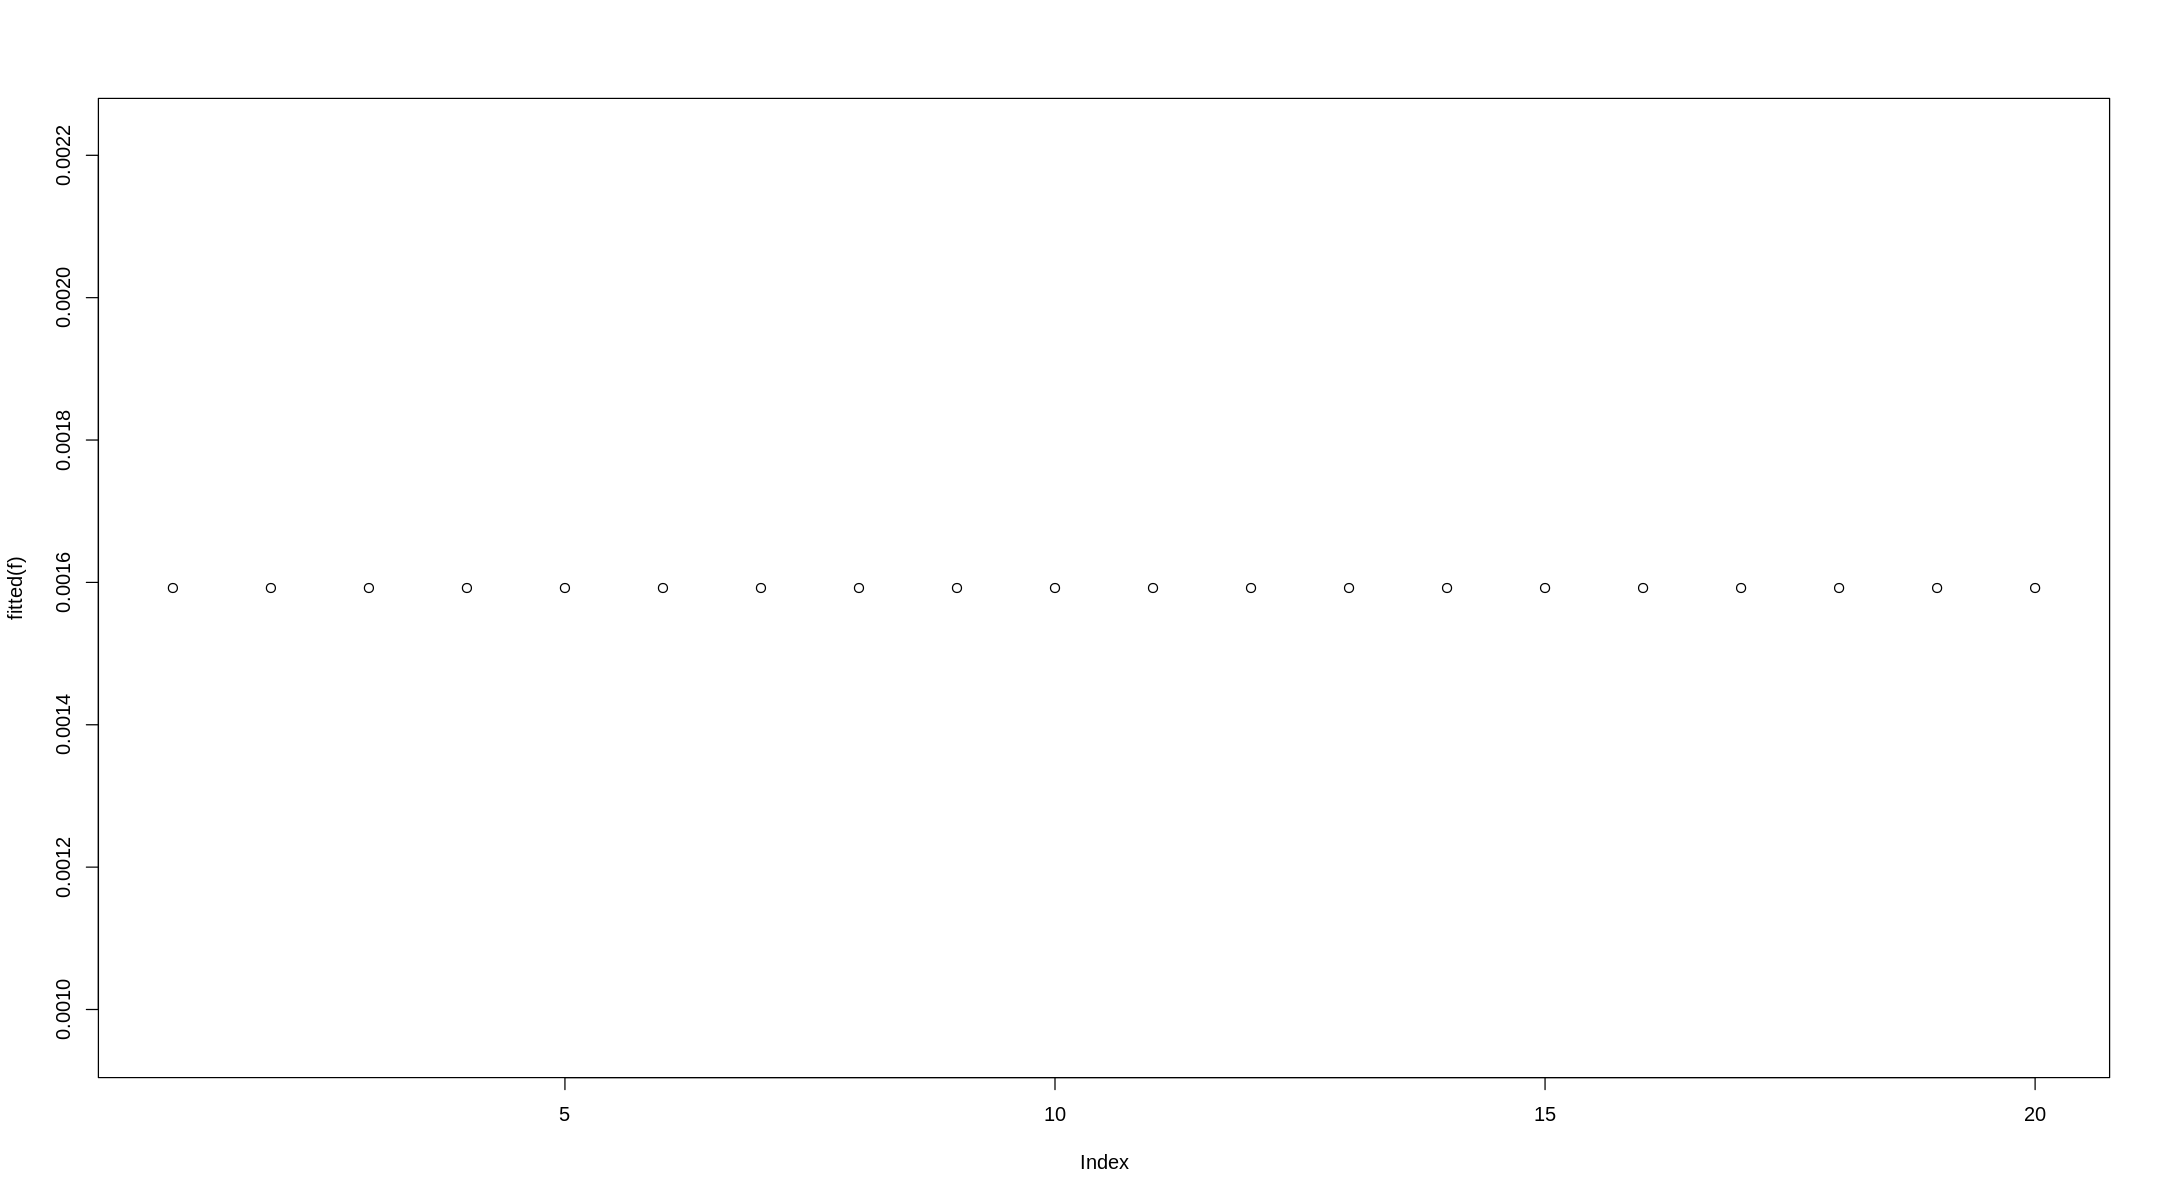

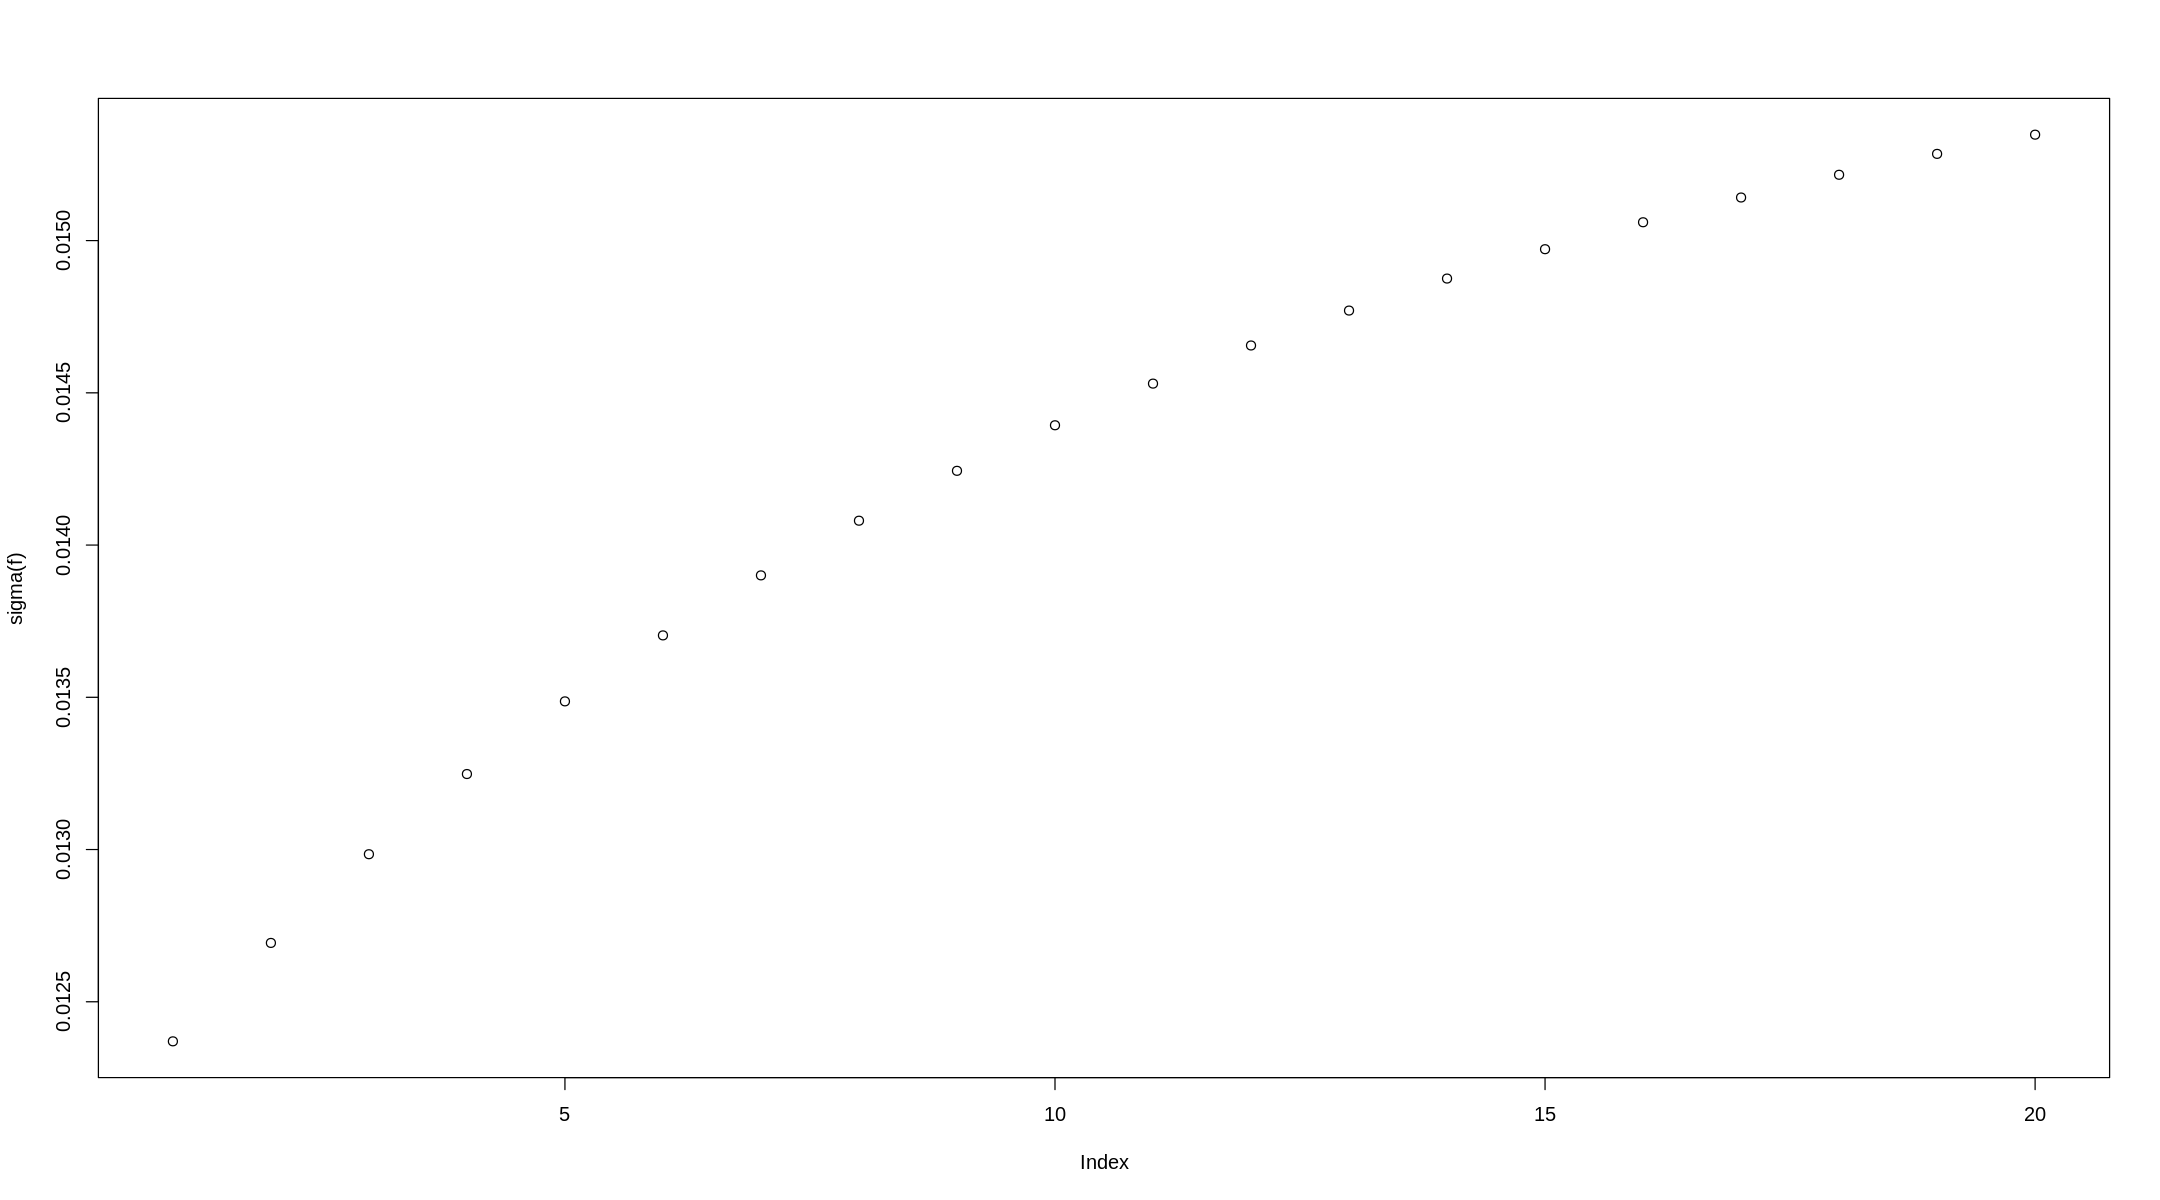

In [10]:
# forecast
f = ugarchforecast(fitORspec = m, n.ahead = 20)
plot(fitted(f)) # constant mean model forecast
plot(sigma(f)) # plot variability


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001168    0.000387   3.0204 0.002524
omega   0.000017    0.000005   3.5862 0.000336
alpha1  0.151074    0.033099   4.5643 0.000005
beta1   0.803394    0.034637  23.1947 0.000000
skew    0.990117    0.037537  26.3770 0.000000
shape   3.846867    0.457060   8.4165 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001168    0.000379   3.0776 0.002087
omega   0.000017    0.000006   3.0480 0.002303
alpha1  0.151074    0.033128   4.5603 0.000005
beta1   0.803394    0.038182  21.0413 0.000000
skew    0.990117    0.033571  29.4932 0.000000
shape   3.846867    0.469912   8.1864 0.000000

LogLike

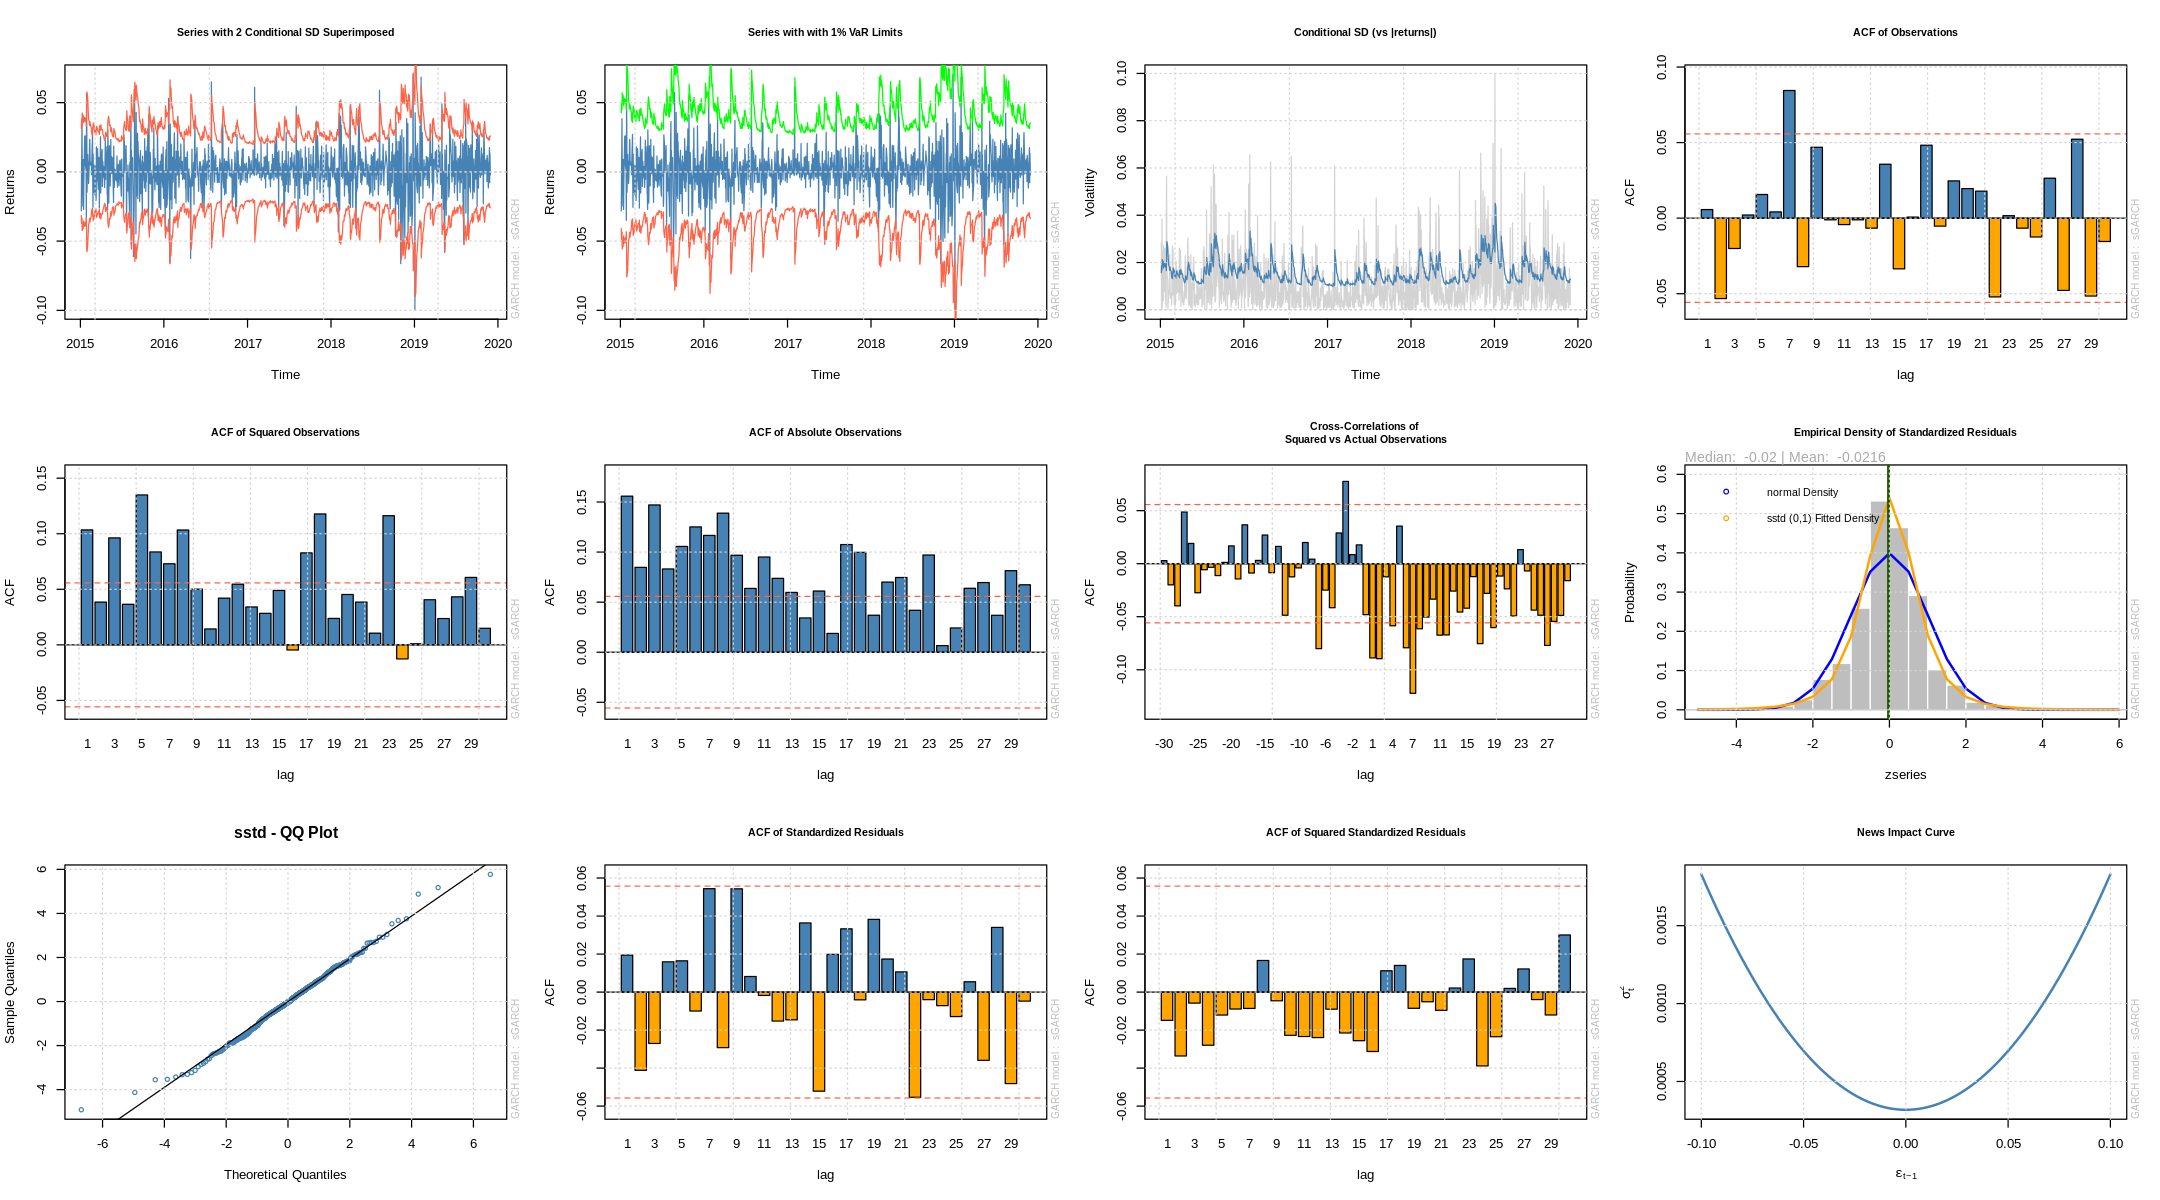

In [11]:
# 2. GARCH with sstd
s <- ugarchspec(mean.model = list(armaOrder = c(0,0)),
                variance.model = list(model = "sGARCH"),
                distribution.model = 'sstd')
m <- ugarchfit(data = return, spec = s)
print(m)
plot(m, which='all')
# Note: all goodness of fit values are > 0.05 which means that this model is a better choice
# Akaike       -5.6892 suggests improvement over model 1


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001035    0.000371  2.786524 0.005328
omega   0.000011    0.000000 61.308803 0.000000
alpha1  0.000001    0.003296  0.000229 0.999817
beta1   0.862412    0.014377 59.984823 0.000000
gamma1  0.208070    0.039102  5.321181 0.000000
skew    0.984907    0.037906 25.983092 0.000000
shape   4.221980    0.508764  8.298509 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001035    0.000386  2.681342 0.007333
omega   0.000011    0.000000 66.267541 0.000000
alpha1  0.000001    0.003883  0.000194 0.999845
beta1   0.862412    0.014172 60.852296 0.000000
gamma1  0.208070    0.038334  5.427847 0

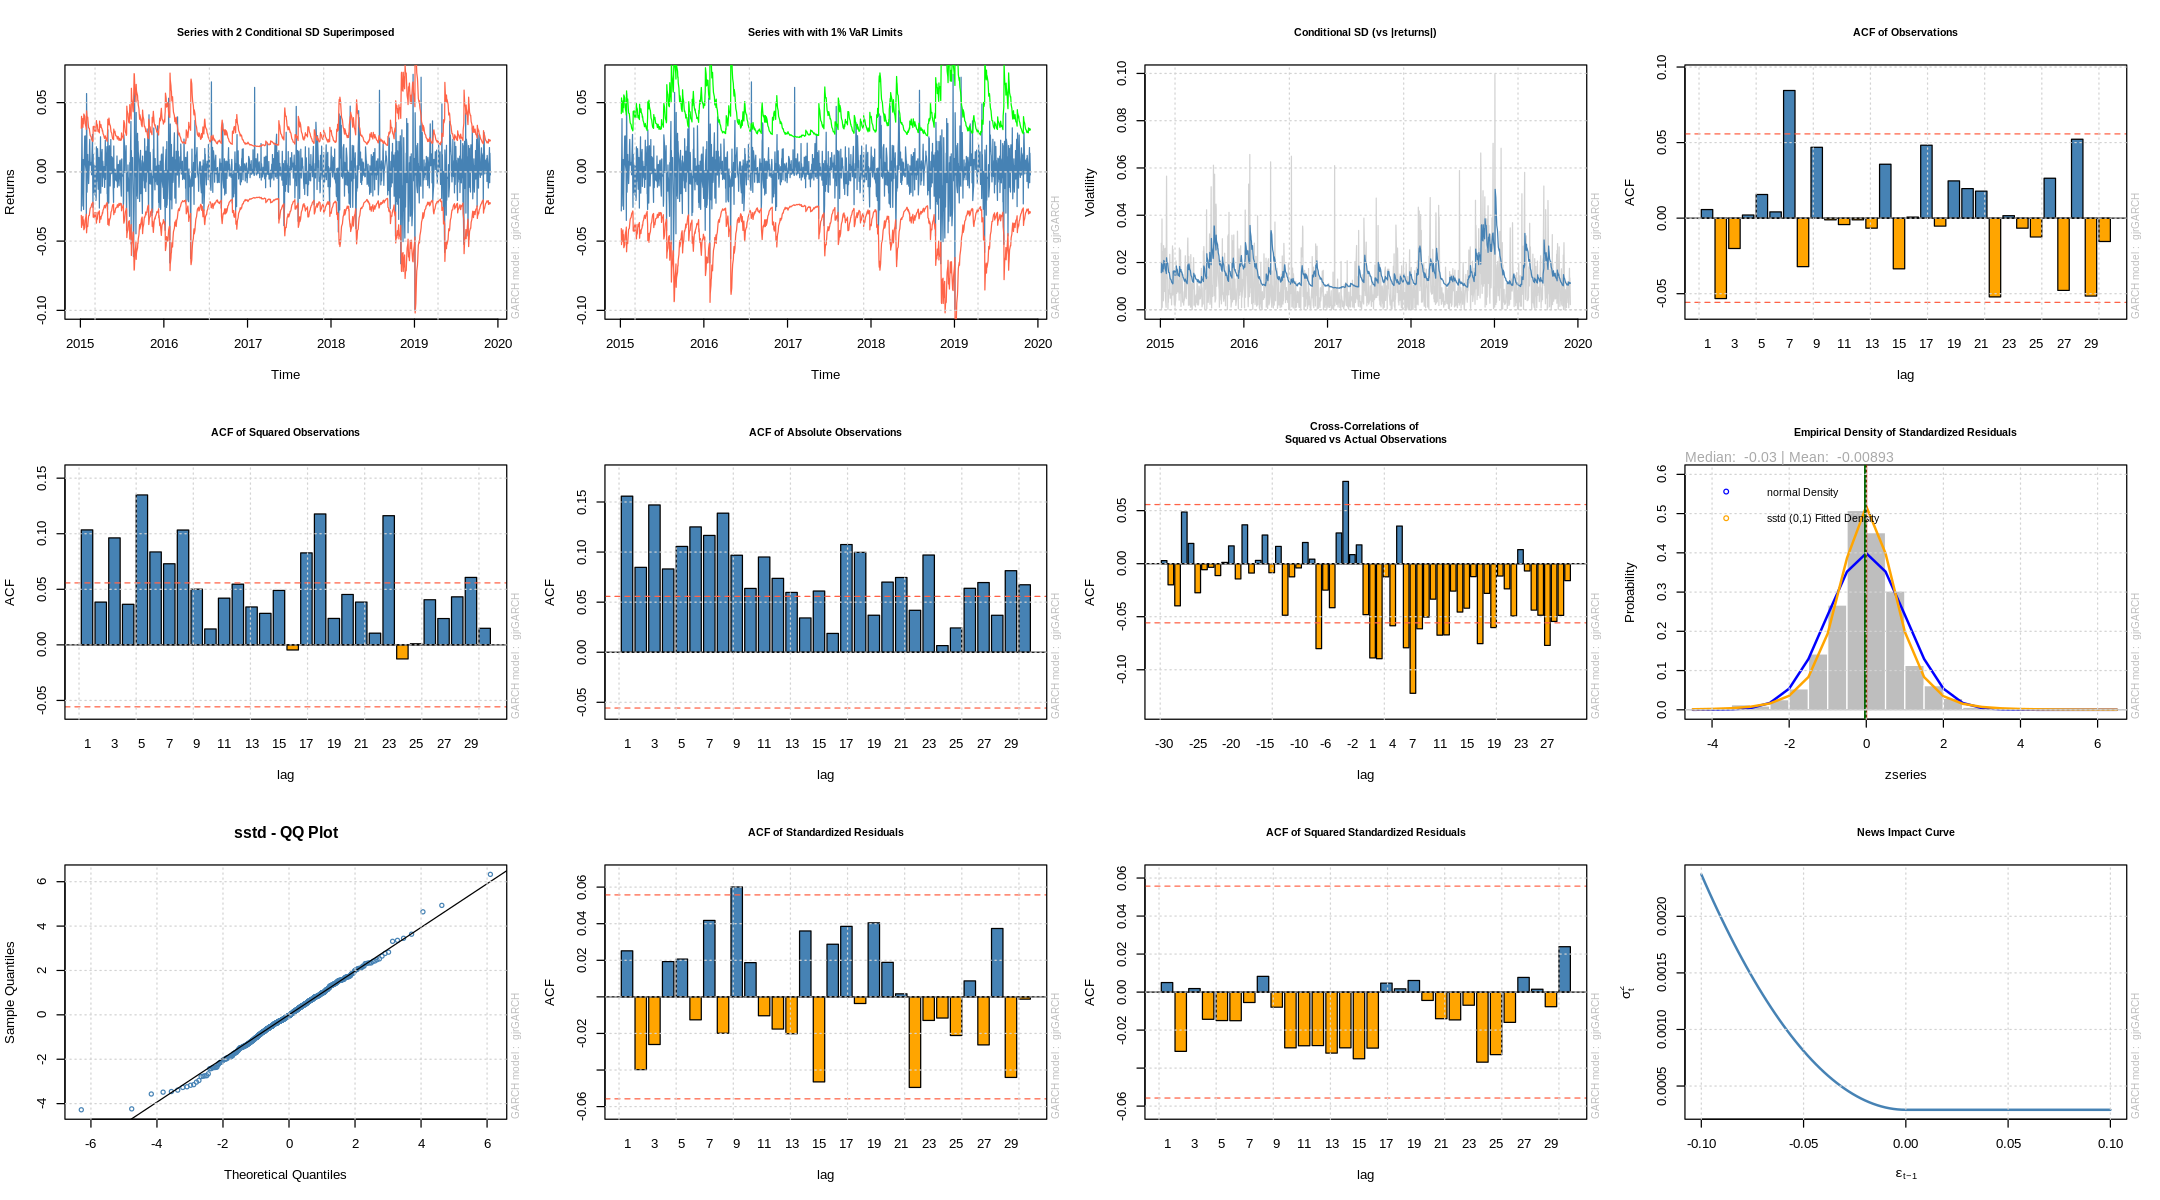

In [12]:
# 3. GJR-GARCH
s = ugarchspec(mean.model = list(armaOrder = c(0,0)),
                variance.model = list(model = "gjrGARCH"),
                distribution.model = 'sstd')
m = ugarchfit(data = return, spec = s)
print(m)
plot(m, which='all')
# Note: all goodness of fit values are > 0.05 which means that this model is a even better choice
# Akaike       -5.7191 suggests improvement over model 2
# a big change in plot 12


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001019    0.000377  2.701834 0.006896
ar1     0.010241    0.027058  0.378482 0.705072
omega   0.000011    0.000000 57.858891 0.000000
alpha1  0.000003    0.003446  0.000886 0.999293
beta1   0.862168    0.014420 59.789941 0.000000
gamma1  0.209001    0.039307  5.317116 0.000000
skew    0.984558    0.037928 25.958455 0.000000
shape   4.231250    0.509814  8.299595 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001019    0.000385  2.642689 0.008225
ar1     0.010241    0.025998  0.393918 0.693641
omega   0.000011    0.000000 63.834275 0.000000
alpha1  0.000003    0.004026  0.000759 0

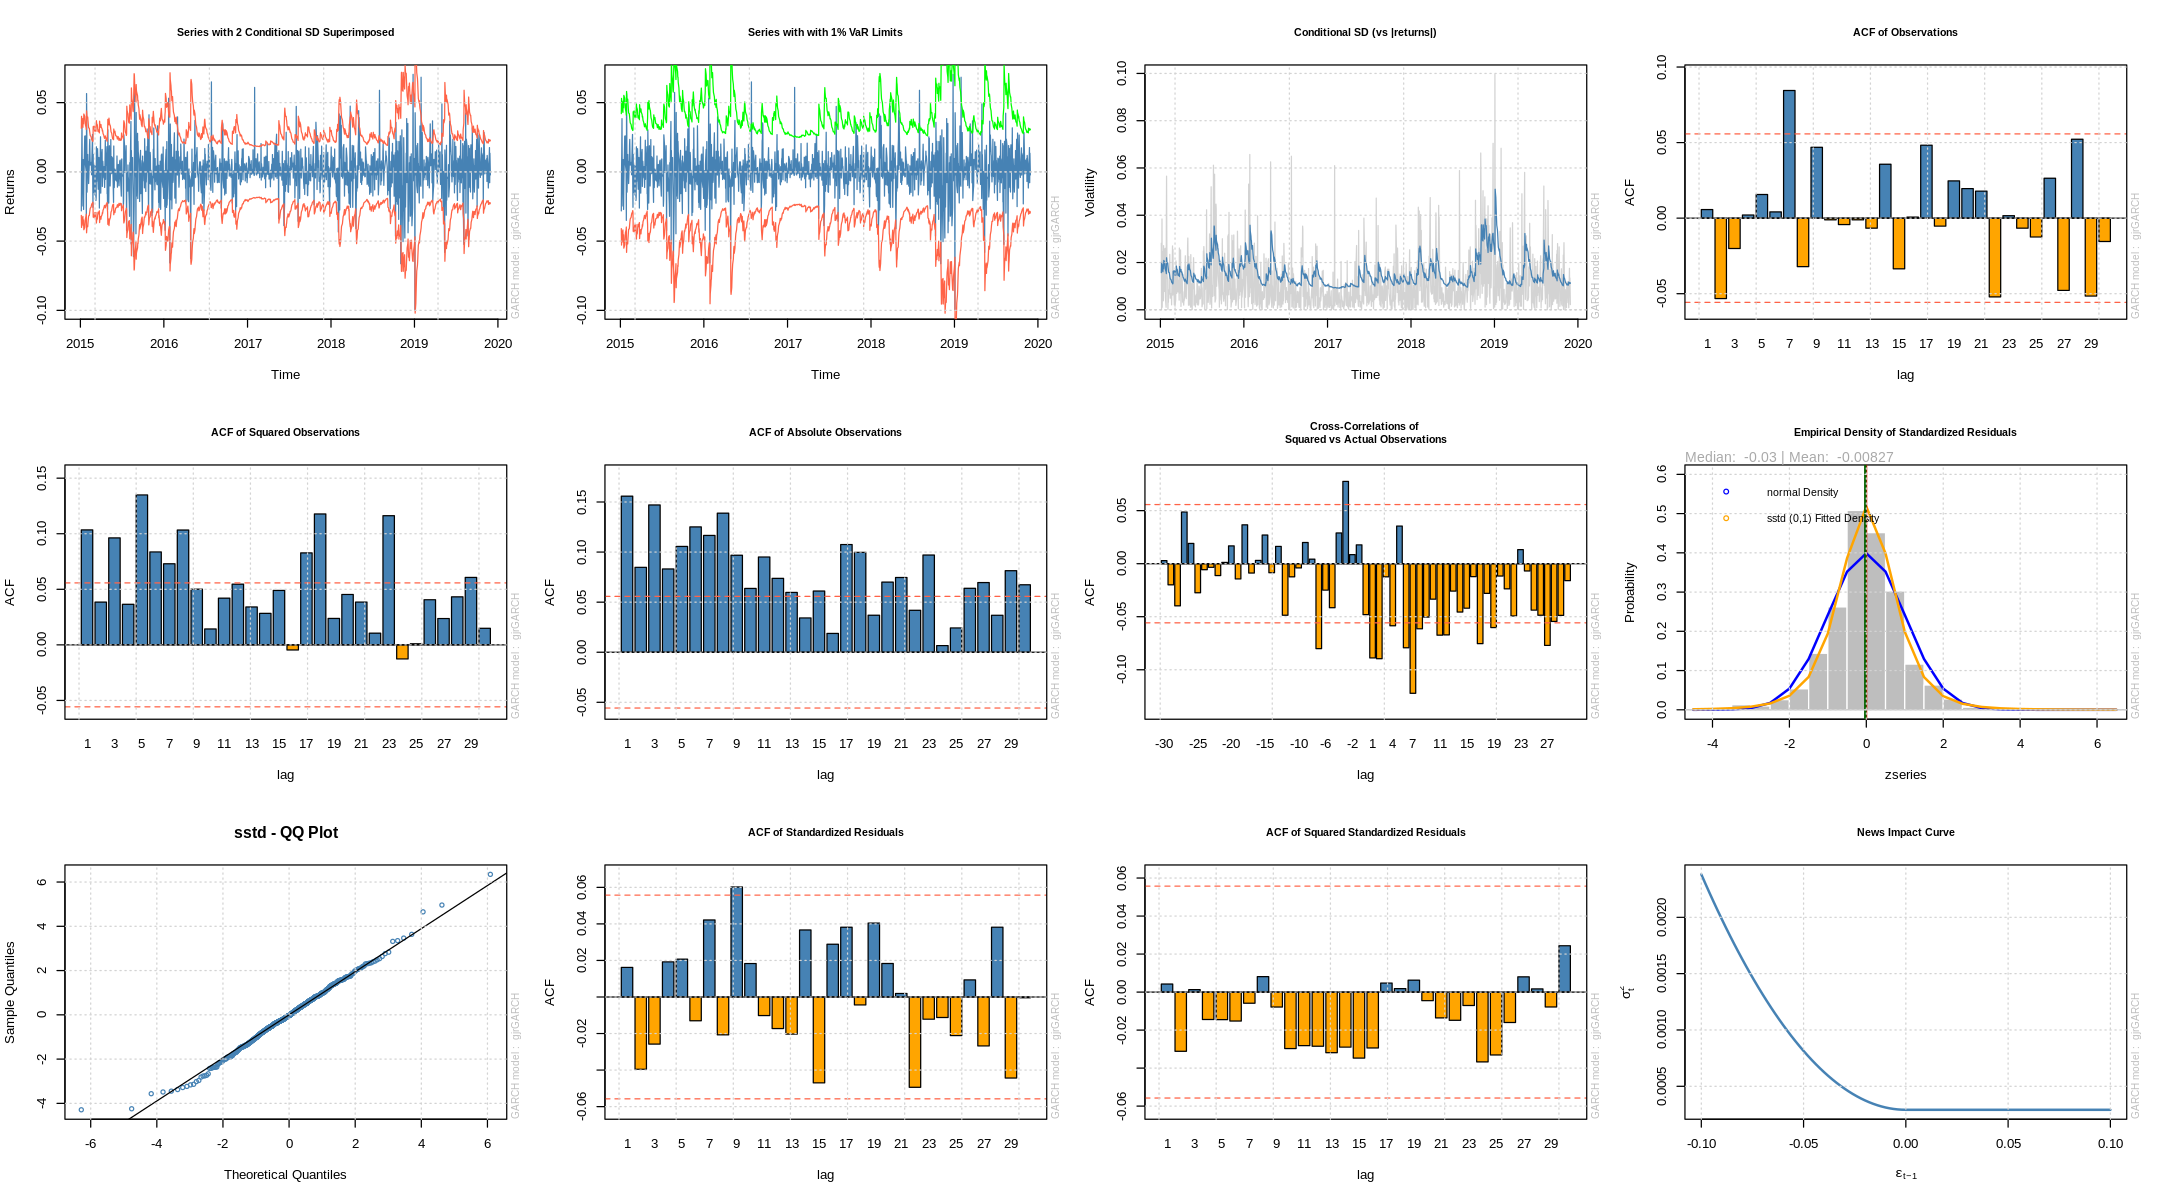

In [13]:
#4. AR(1) GJR-GARCH
s = ugarchspec(mean.model = list(armaOrder = c(1,0)),
                variance.model = list(model = "gjrGARCH"),
                distribution.model = 'sstd')
m = ugarchfit(data = return, spec = s)

print(m) # Note: ar1 is not found to be significant in this case
plot(m, which='all')


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001074    0.000556  1.930935 0.053491
archm  -0.222947    2.374351 -0.093898 0.925190
omega   0.000011    0.000000 58.477362 0.000000
alpha1  0.000000    0.004680  0.000033 0.999973
beta1   0.862917    0.014503 59.500326 0.000000
gamma1  0.208218    0.040122  5.189572 0.000000
skew    0.984384    0.038307 25.697494 0.000000
shape   4.223459    0.508946  8.298448 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001074    0.000559  1.921219 0.054704
archm  -0.222947    2.184346 -0.102066 0.918705
omega   0.000011    0.000000 61.926899 0.000000
alpha1  0.000000    0.005096  0.000031 0

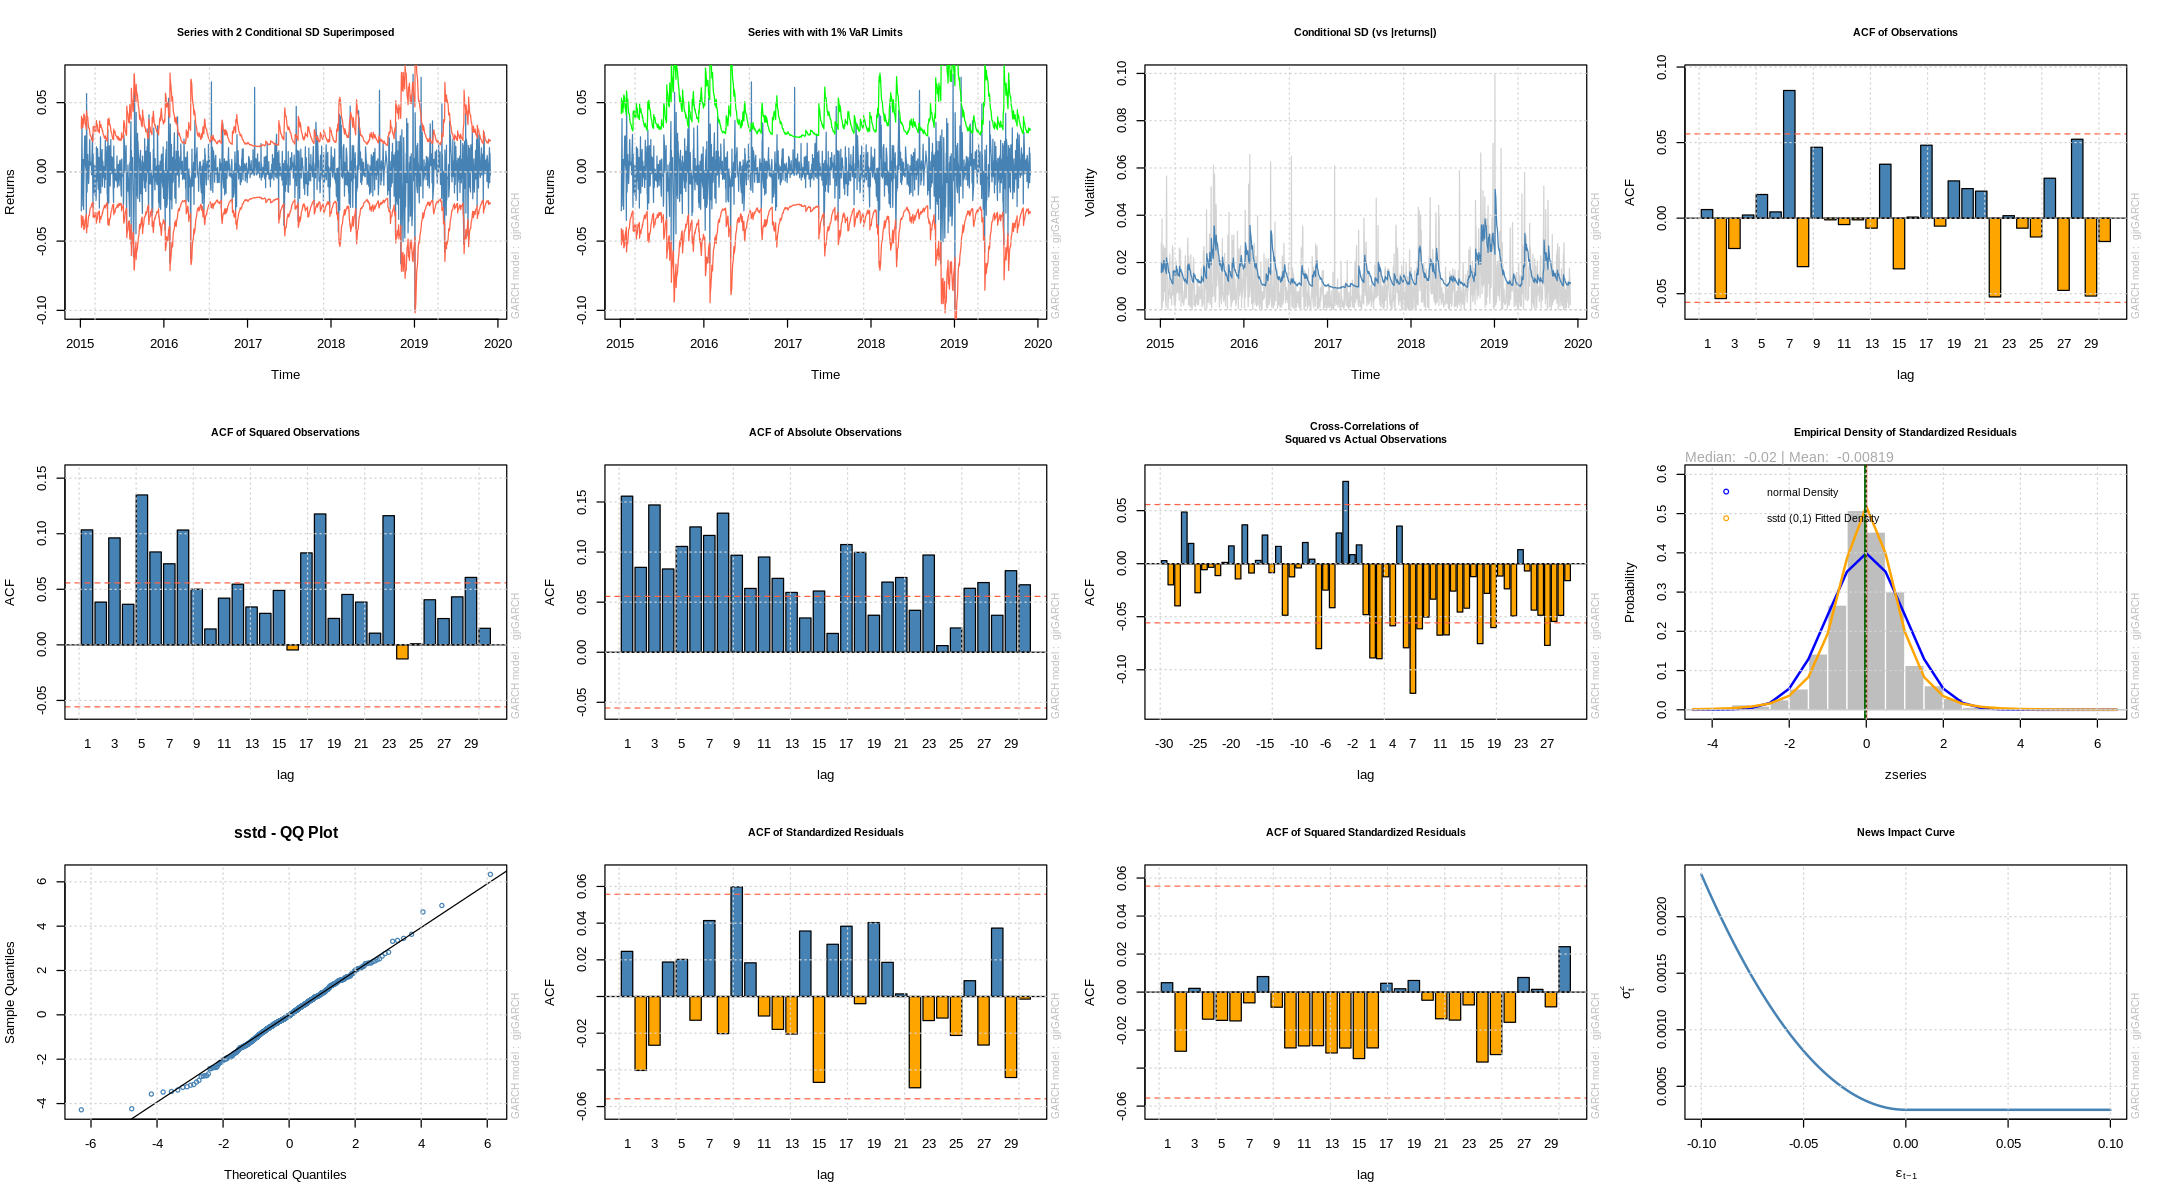

In [14]:
#5. GJR-GARCH in mean
s = ugarchspec(mean.model = list(armaOrder = c(0,0),
                                  archm =T,
                                  archpow = 2),
                variance.model = list(model = "gjrGARCH"),
                distribution.model = 'sstd')
m = ugarchfit(data = return, spec = s)

print(m) # Note: archm is also not found to be significant in this case hence we go to model 3
plot(m, which='all')

**We select model 3 and simulate the stock prices of apple**

In [15]:
# Simulation

In [16]:
# run model 3 again and capture coefficients
s = ugarchspec(mean.model = list(armaOrder = c(0,0)),
                variance.model = list(model = "gjrGARCH"),
                distribution.model = 'sstd')
m = ugarchfit(data = return, spec = s)
sfinal = s
setfixed(sfinal) = as.list(coef(m))
sfinal


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: gjrGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(0,0,0)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  sstd 
Includes Skew	:  TRUE 
Includes Shape	:  TRUE 
Includes Lambda	:  FALSE 


##### forecast on 2019 data

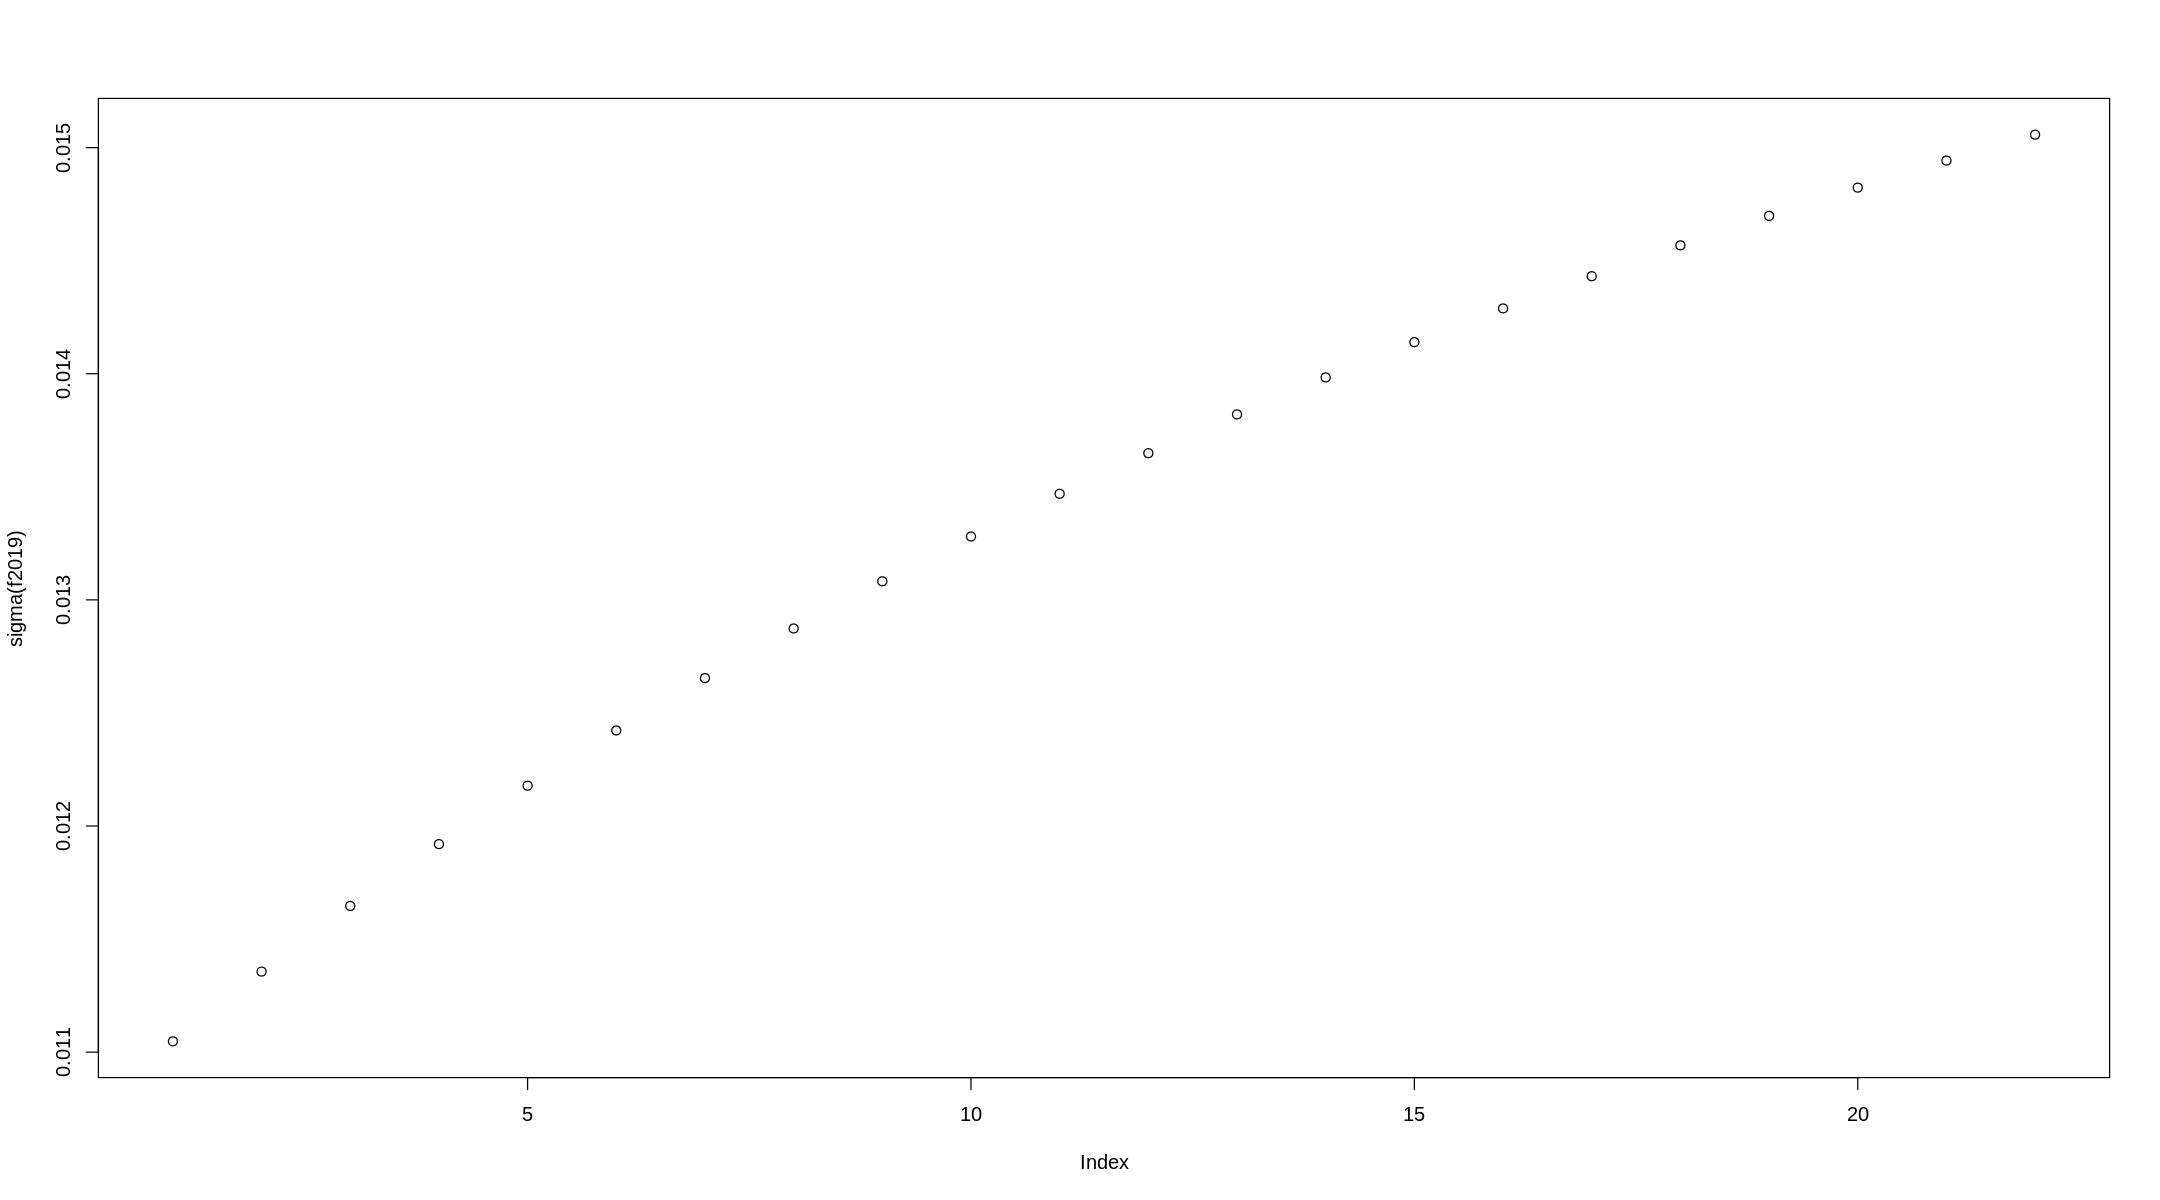

In [17]:
f2019 = ugarchforecast(data = return["/2019-11"],
                        fitORspec = sfinal,
                        n.ahead = 22)
plot(sigma(f2019))

In [18]:
# simulate 3 return series for next month
sim = ugarchpath(spec = sfinal,
                  m.sim = 1,
                  n.sim = 1*20,
                  rseed = 123)

In [19]:
# look at the variability of the simulation
# plot.zoo(fitted(sim))
# plot.zoo(sigma(sim))

##### Actual prices

In [20]:
# inspect the last value in 2019 Nov (AAPL.Close) = 66.8125
tail(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2019-11-21   65.9225   66.0025  65.2950    65.5025   121395200      64.63797
2019-11-22   65.6475   65.7950  65.2100    65.4450    65325200      64.58122
2019-11-25   65.6775   66.6100  65.6300    66.5925    84020400      65.71357
2019-11-26   66.7350   66.7900  65.6250    66.0725   105207600      65.20045
2019-11-27   66.3950   66.9950  66.3275    66.9600    65235600      66.07623
2019-11-29   66.6500   67.0000  66.4750    66.8125    46617600      65.93066

In [21]:
# get actual prices for testing period
getSymbols("AAPL",from = "2019-12-01",to = "2019-12-31")

[1] "AAPL"

In [22]:
p = 66.8125*apply(fitted(sim), 2, 'cumsum') + 66.8125

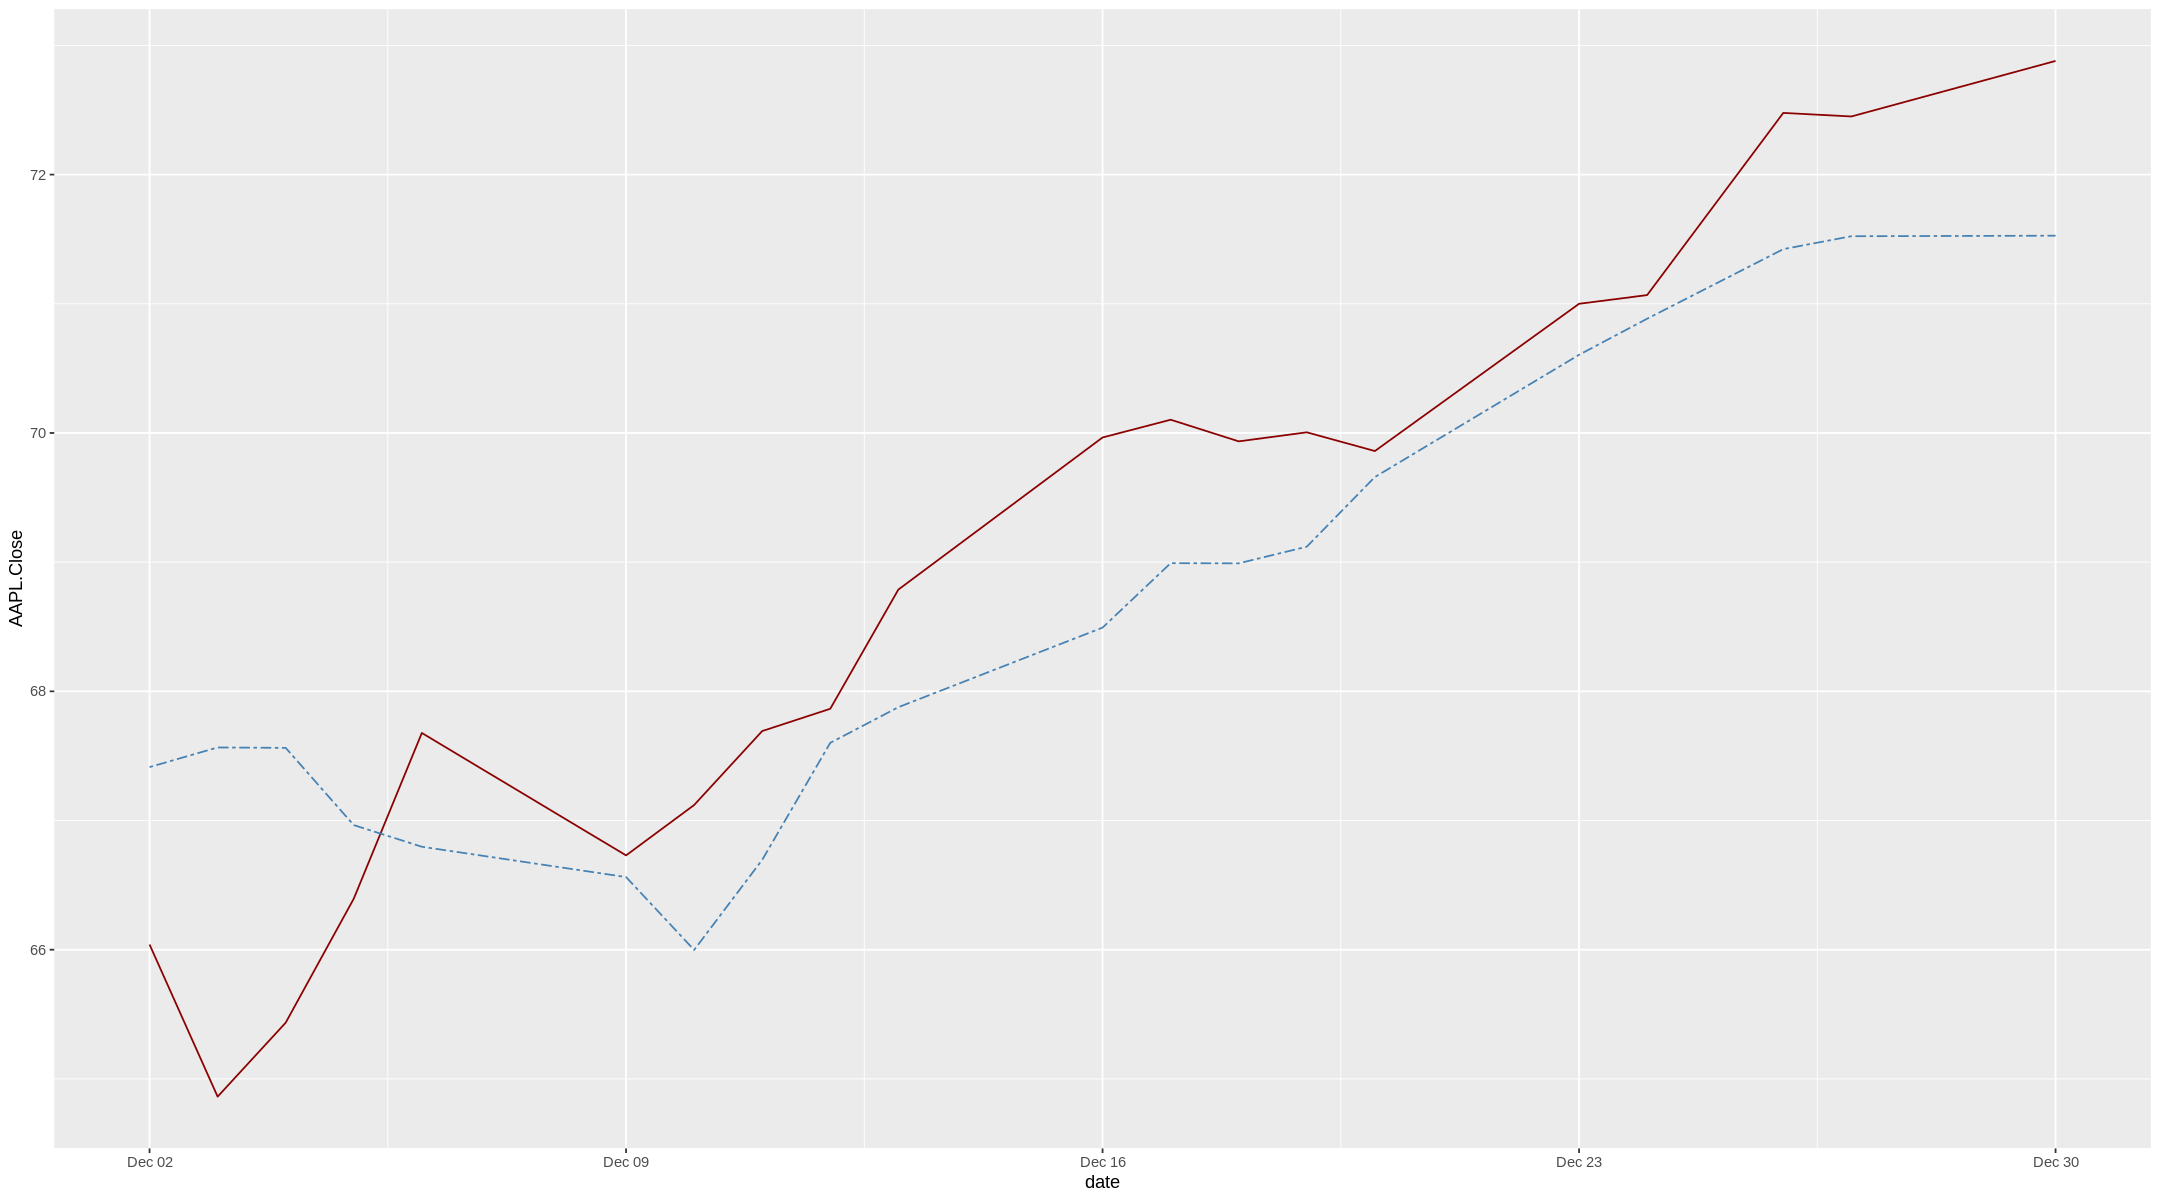

In [28]:
df = data.frame(AAPL$AAPL.Close)
df$date = ymd(row.names(df))
row.names(df) = NULL

df$predicted.close = p
# df

# plot both: actual close and predicted close
ggplot(df, aes(x=date)) + 
  geom_line(aes(y = AAPL.Close), color = "darkred") + 
  geom_line(aes(y = predicted.close), color="steelblue", linetype="twodash") 

#### R2 and error computation

In [24]:
# errors
d = df$AAPL.Close-df$predicted.close
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((df$AAPL.Close-mean(df$AAPL.Close))^2))

cat(" MAE:", mae, "\n", "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", "R-squared:", R2)

 MAE: 0.9820069 
 MSE: 1.355172 
 RMSE: 1.164118 
 R-squared: 0.7554138

**Further:**  Compare this model with the ARIMA forecast